<a href="https://colab.research.google.com/github/JSheleg/ut_austin_aiml_cert/blob/main/Sheleg_ML_Churn_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [ ]:
# Installing different version of scikit-learn
!pip install scikit-learn==1.3.2

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again*.

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# mount google colab notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading the dataset

In [ ]:
churn = pd.read_csv("/content/drive/MyDrive/UT_Austin_ML/advanced_machine_learning/project3_credit_card_churn/BankChurners.csv")

In [ ]:
data = churn.copy()

## Data Overview

- Observations
- Sanity checks

In [ ]:
# view head of data
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [ ]:
# view tail of data
data.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


In [ ]:
# data shape
data.shape

(10127, 21)

In [ ]:
# data details
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

* There are 21 columns and 10,127 rows in the dataset
* All columns data type is either integer or float except 6 columns `Attrition_Flag`, `Gender`, `Education_Level`,`Marital_Status`, `Income_Category`, and `Card_Category` which register as object, but need to be converted to category
* There are missing data in 2 columns `Education_Level` and `Marital_Status`

In [ ]:
# Check for duplicates
data.duplicated().sum()

0

In [ ]:
# Explore object variables
data.Attrition_Flag.unique()


array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [ ]:
data.Gender.unique()

array(['M', 'F'], dtype=object)

In [ ]:
data.Education_Level.unique()

array(['High School', 'Graduate', 'Uneducated', nan, 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [ ]:
data.Marital_Status.unique()

array(['Married', 'Single', nan, 'Divorced'], dtype=object)

In [ ]:
data.Income_Category.unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'abc'], dtype=object)

In [ ]:
data.Income_Category.value_counts()

,count
Income_Category,
Less than $40K,3561
$40K - $60K,1790
$80K - $120K,1535
$60K - $80K,1402
abc,1112
$120K +,727


* There is a category in `Income_Category` that is 'abc'. There are 1112 with that category. I am assumming that was either an indication of a missing value or a yet to be named category. This will be something that needs to be looked into.

In [ ]:
data.Card_Category.unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [ ]:
# statistics of data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


* `CLIENTNUM` has all unique values -- this should be dropped as it provides no value
* `Customer_Age` has an average age of 46.33 and seems to be normally distributed. Ages range from 26 to 73.
* `Dependent_count` has and average of 2.35 so it looks like it might be slighly skewed since 2.0 is the 50%
* `Months_on_book` has an average of 35.9 months with the bank and seems to be normally distributed
* `Top_Relationship_Count` has an average of 3.8 products with a max number of products of 6.
* `Months_Inactive_12_mon` has an average of 2.34 months without activity
* `Contacts_Count_12_mon` has an average of 2.45 interactions in 12 months
* `Credit_Limit` has an average credit limit of 8631 dollars while 50% of the data 4549 which indicates the data is right skewed.
* `Total_Revolving_Bal` has an average monthly balance of 1162.
* `Total_Trans_Ct` has an average of 64 transactions in the last 12 months
* `Avg_Utilization_Ratio` average utilization ratio of 0.275 while the 50% is 0.176 which indicates that the data is right skewed

In [ ]:
# check for missing data
data.isna().sum()

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,1519
Marital_Status,749
Income_Category,0
Card_Category,0
Months_on_book,0


* In `Income_Category`, there seems to be a random category. Most likely a placeholder. This will need to be handeled.
* `Education_Level` and `Marital_Status` have missing data of 1519, and 749 respectively.

In [ ]:
# CLIENTUM consists of unique IDs of the clients and will not add value
data.drop(["CLIENTNUM"], axis=1, inplace=True)

In [ ]:
# Encode Existing Customer = 0 and Attrited Customer = 1
data['Attrition_Flag'] = data['Attrition_Flag'].replace({"Existing Customer": 0, "Attrited Customer": 1})

In [ ]:
# confirm updates
data.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [ ]:
data.Attrition_Flag.unique()

array([0, 1])

In [ ]:
# convert object variables to categorical
cat_cols = [
    'Attrition_Flag',
    'Gender',
    'Education_Level',
    'Marital_Status',
    'Income_Category',
    'Card_Category'
]
data[cat_cols] = data[cat_cols].astype('category')

In [ ]:
for i in data.describe(include=['category']).columns:
  print("Unique values in", i, "are :")
  print(data[i].value_counts())
  print("*" * 50)

Unique values in Attrition_Flag are :
Attrition_Flag
0    8500
1    1627
Name: count, dtype: int64
**************************************************
Unique values in Gender are :
Gender
F    5358
M    4769
Name: count, dtype: int64
**************************************************
Unique values in Education_Level are :
Education_Level
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64
**************************************************
Unique values in Marital_Status are :
Marital_Status
Married     4687
Single      3943
Divorced     748
Name: count, dtype: int64
**************************************************
Unique values in Income_Category are :
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: count, dtype: int64
**************************************************
U

* Of the 10127 customers 1627 have closed their accounts. 16% of the customer popluation
* Of the customers, about 52% is female.
* The education_level with the most number of customers is Graduate
* 46% of customers are married
* The Income_Cateogory wit the most about of customers is the Less than 40k group.
* A large majority of customers hold Blue Cards from the Card Category

In [ ]:
# View stats on Categorical Data
data.describe(include=['category']).T

,count,unique,top,freq
Attrition_Flag,10127,2,0,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           8608 non-null   category
 5   Marital_Status            9378 non-null   category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
  * Total_Trans_Amt is skewed right with a around 75% of customers having total transactions less than 5000.
2. What is the distribution of the level of education of customers?
  * About 85% of the customers are educated with the highest single category is Graduate
3. What is the distribution of the level of income of customers?
  * About half of customers make less than 40,000/annually
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
  * This value is higher for existing customers where Attrition Flag is 0
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
  * Attrited customerse tend to be inactive for either 0 months, 3 or 4. If a customer is only been Inactive for a month, they are the least likely to close their account and their Attrition_Flag is 0
6. What are the attributes that have a strong correlation with each other?
  * Customer_Age vs Months_on_book, Total_Revolving_Bal vs Avg_Utilization_Ratio, Total_Trans_Amt vs Total_Trans_Ct, Credit_Limit vs Avg_Utilization_Ratio and Avg_Open_To_Buy vs Avg_Utilization_Ratio



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

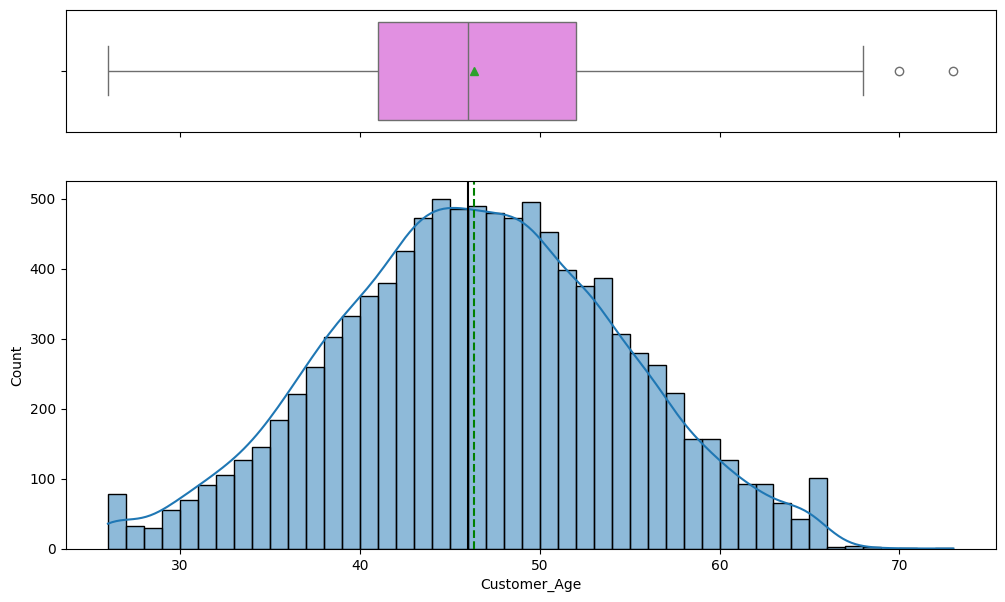

In [ ]:
# Customer Age
histogram_boxplot(data, "Customer_Age", kde=True)

* Data seems to be slightly skewed right with a few outliers

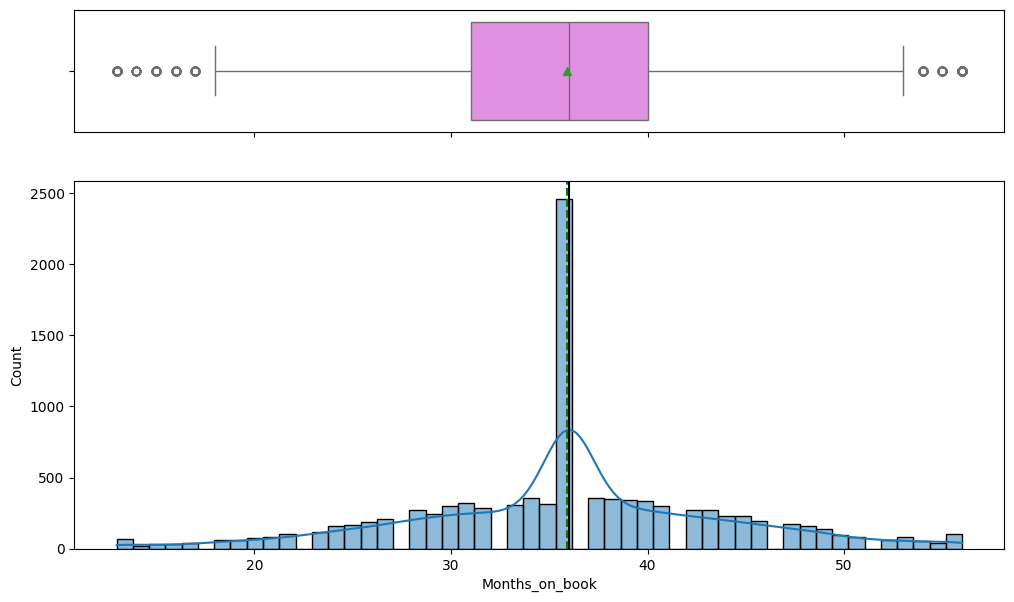

In [ ]:
# Months_on_book
histogram_boxplot(data, 'Months_on_book', kde=True)

* Months on book looks to be normally distributed with a few outliers on both sides.
* The majority of customers have about 36 months on the books

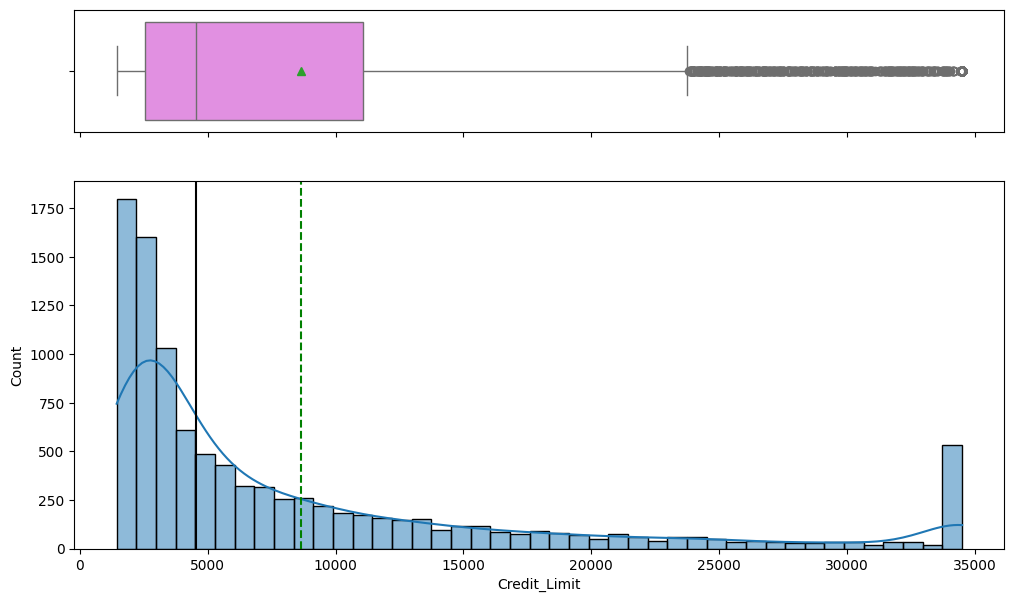

In [ ]:
# Credit_Limit
histogram_boxplot(data, "Credit_Limit", kde=True)

* Credit_Limit is greatly skewed to the right with an average around 8500.
* Majority of credit limits are under 5000
* There multiple outliers on the higher end of the credit limit

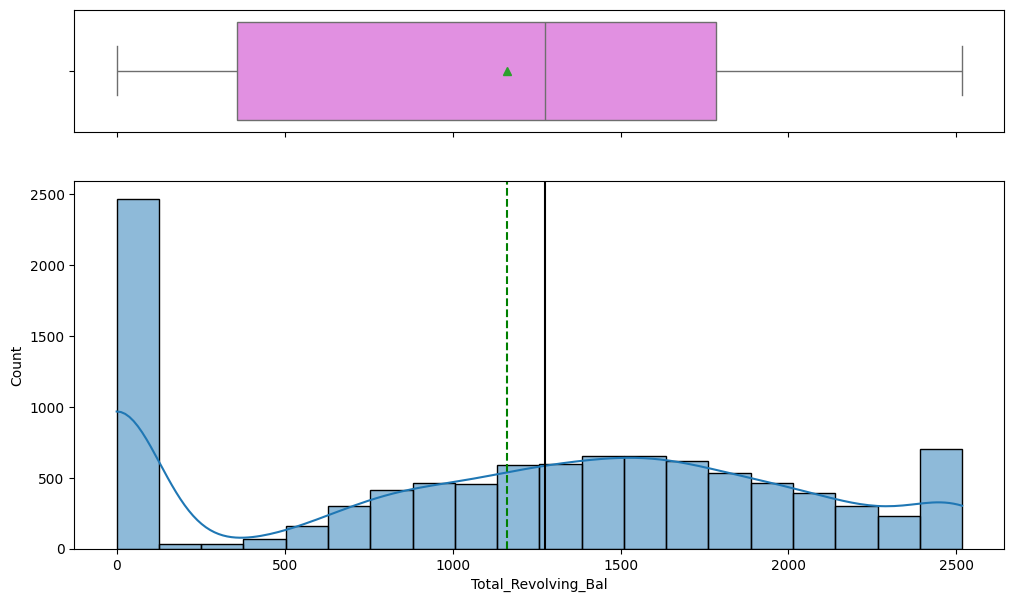

In [ ]:
# Total_Revolving_Bal
histogram_boxplot(data, "Total_Revolving_Bal", kde=True)

* majority of customers have a 0 balance for revolving balance with the next largest amount of customers have a revlovling balance of just under 2500.
* There are no outliers


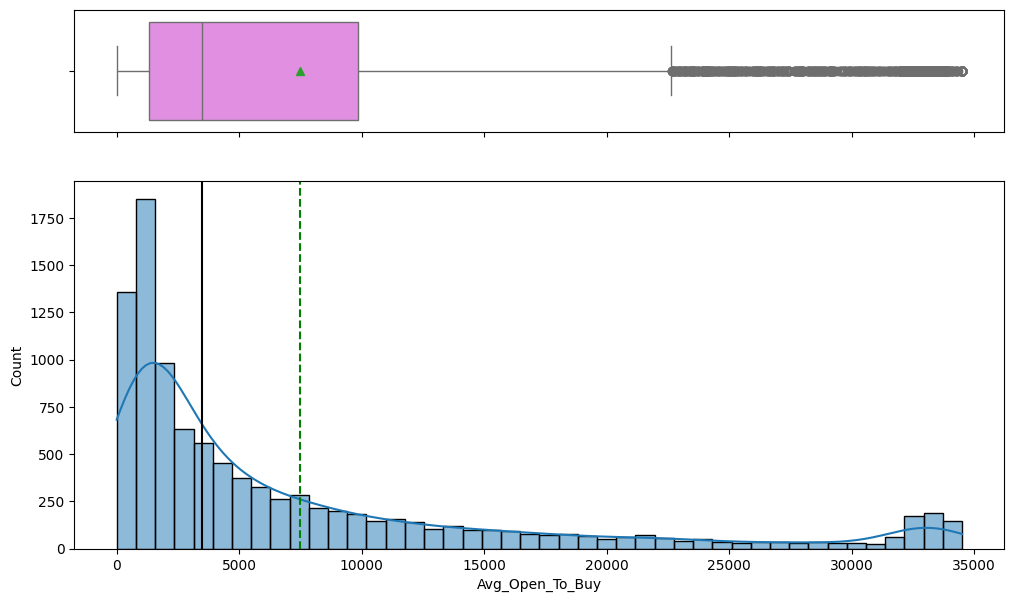

In [ ]:
# Avg_Open_To_Buy
histogram_boxplot(data, "Avg_Open_To_Buy", kde=True)

* Avg_Open_To_Buy is right skewed with multiple outliers on the higher end of the data.


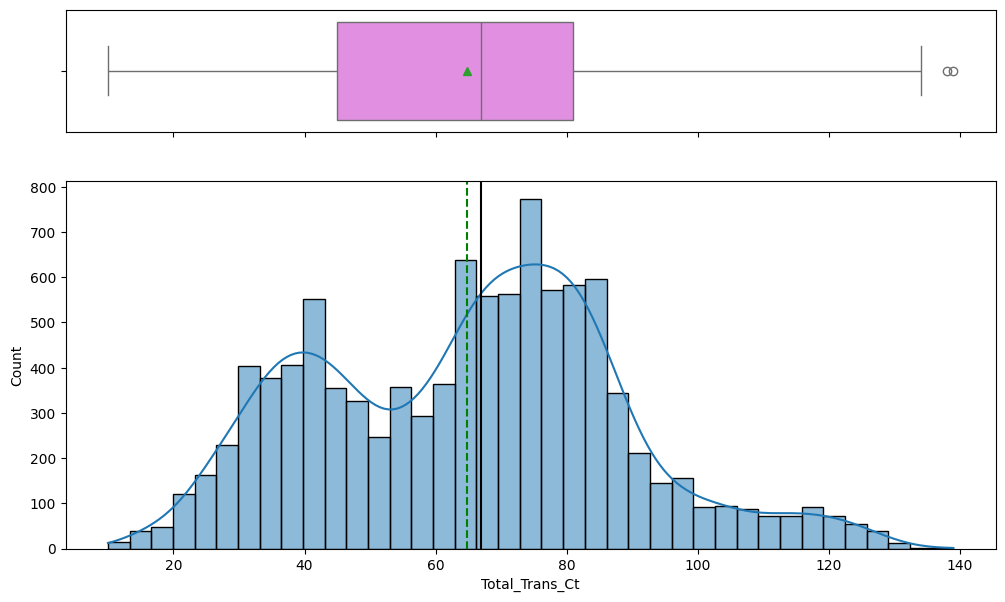

In [ ]:
# Total_Trans_Ct
histogram_boxplot(data, "Total_Trans_Ct", kde=True)

* Total_Trans_Ct has a bi-modal distribution
* The peaks are around 40 and just under 80 Transactions
* There a few outliers on the higher end of the data

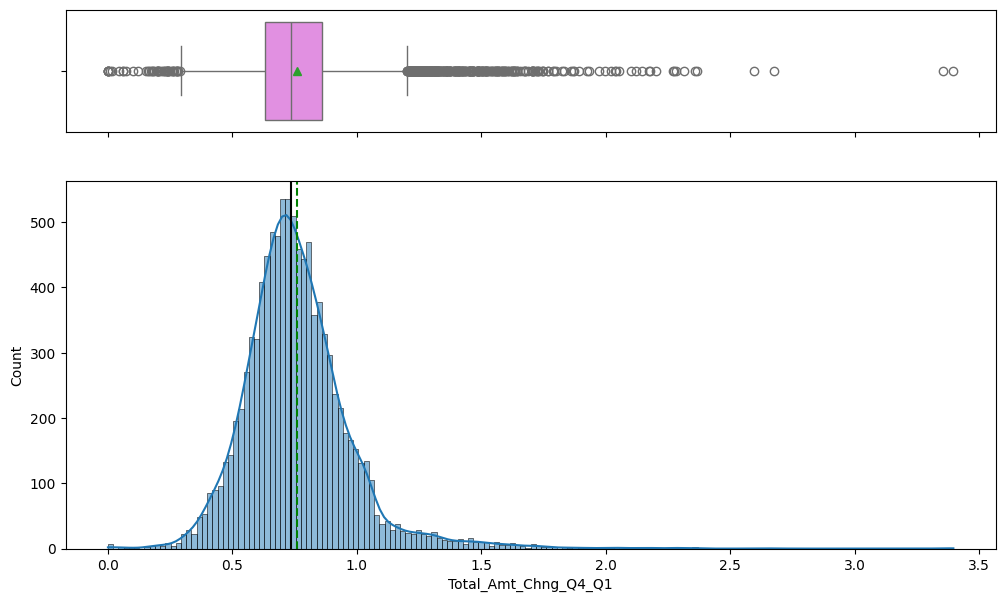

In [ ]:
# Total_Amt_Chng_Q4_Q1
histogram_boxplot(data, "Total_Amt_Chng_Q4_Q1", kde=True)

* Total_Amt_Chng_Q4_Q1 is skewed to the right with multiple outliers on both ends of the data

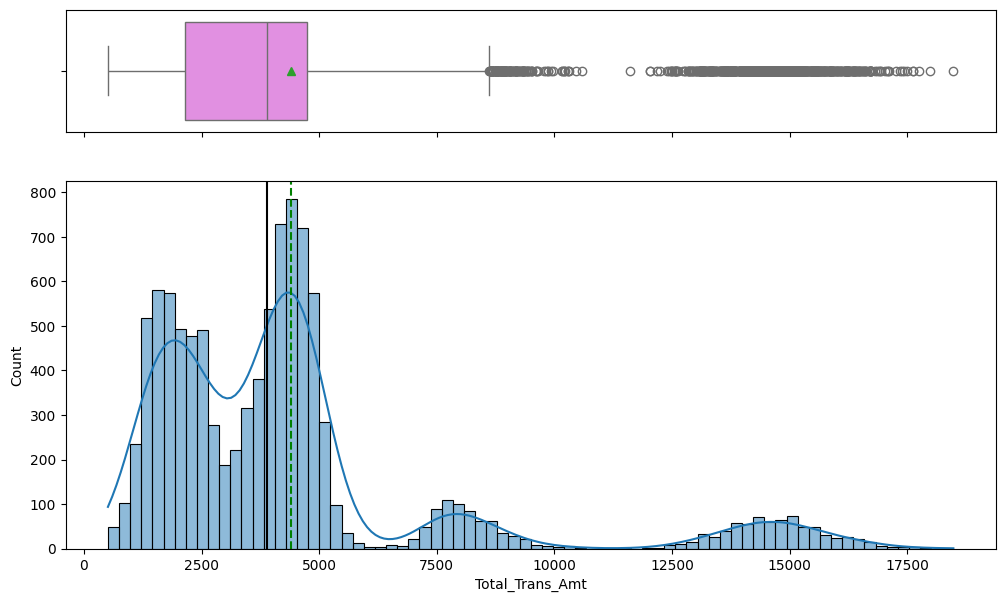

In [ ]:
# Total_Trans_Amt
histogram_boxplot(data, "Total_Trans_Amt", kde=True)

* Total_Trans_Amt have a multimodal distribution.
* The 4 peaks around 1500, 4400, 8000 and 14000
* There are large amount of outliers on the higher end

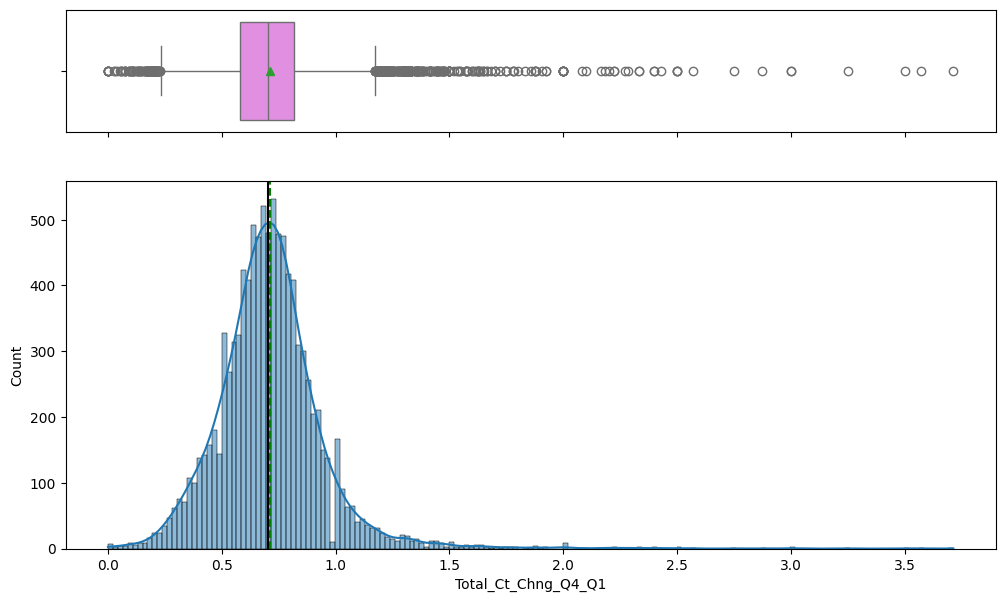

In [ ]:
# Total_Ct_Chng_Q4_Q1
histogram_boxplot(data, "Total_Ct_Chng_Q4_Q1", kde=True)

* Total_Ct_Chng_Q4_Q1 is skewed to the right with outliers on both sides of the data

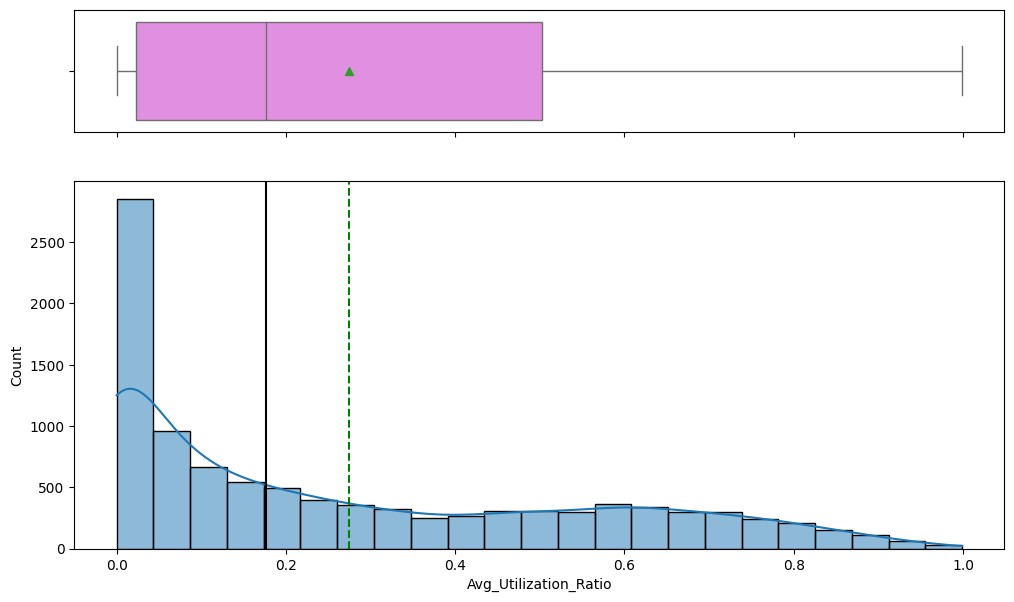

In [ ]:
#Avg_Utilization_Ratio
histogram_boxplot(data, "Avg_Utilization_Ratio", kde=True)

* Avg_Utilization_Ratio is skewed right with majority of customers having a utilization ratio around 0

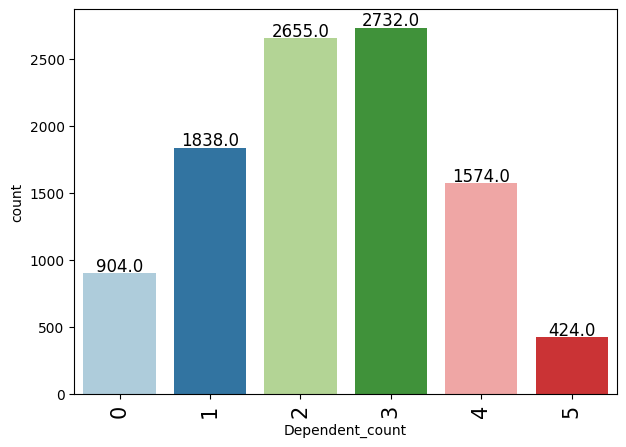

In [ ]:
# Dependent_count
labeled_barplot(data, "Dependent_count")

* Dependent_count has majority of customers with 2 and 3 dependents.
* The least represented amount of dependents is 5

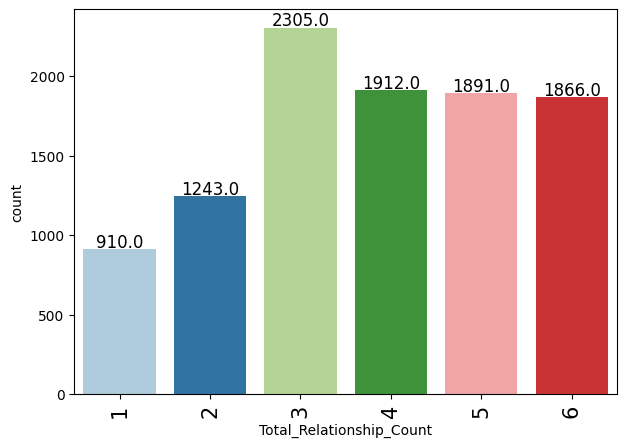

In [ ]:
# Total_Relationship_Count
labeled_barplot(data, "Total_Relationship_Count")

* The largest amount of customers have 3 products with the bank
* 4, 5 and 6 products are also popular with customers

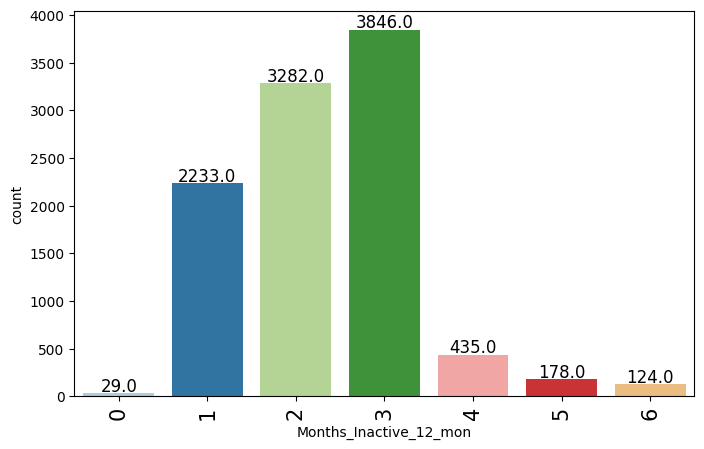

In [ ]:
# Months_Inactive_12_mon
labeled_barplot(data, "Months_Inactive_12_mon")

* Customers tend to be inactive for 1, 2 or 3 months at a time with majority being inactive for 3 months

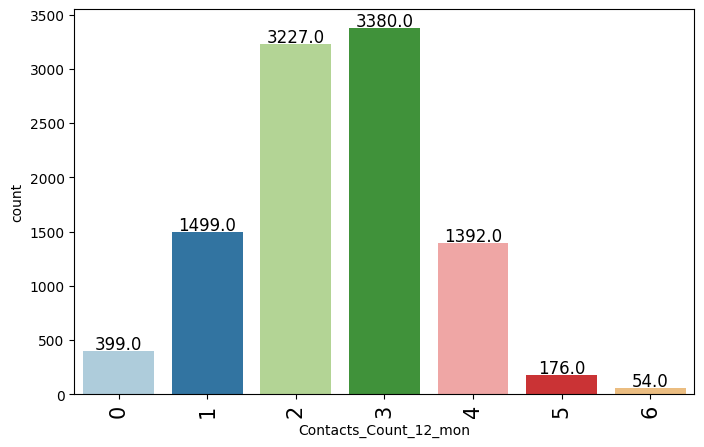

In [ ]:
# Contacts_Count_12_mon
labeled_barplot(data, "Contacts_Count_12_mon")

* Majority of Customers tend to interact with the bank between 1-4 times in a 12 month time frame with 2 and 3 interactions being the most common

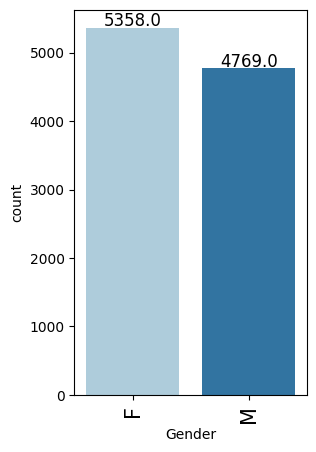

In [ ]:
# Gender
labeled_barplot(data, "Gender")

* Most of the customers are Female though they are pretty close

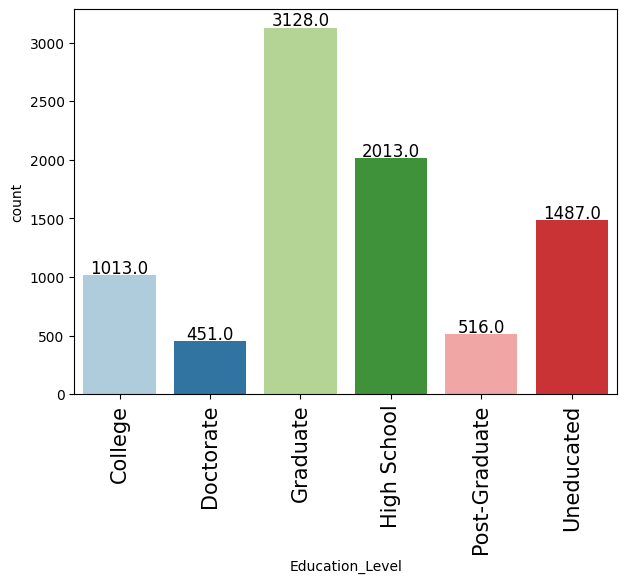

In [ ]:
# Education_Level
labeled_barplot(data, "Education_Level")

* Education_Level with the largest amount of customers is Graduate with High School being the second largest

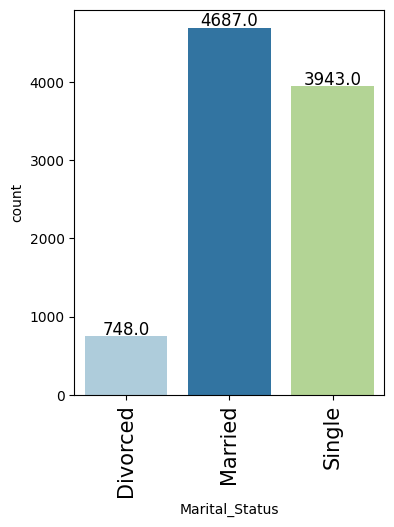

In [ ]:
# Marital_Status
labeled_barplot(data, "Marital_Status")

* Married is the largest represented category of customers with Divorce being the lowest represented category within the customer base

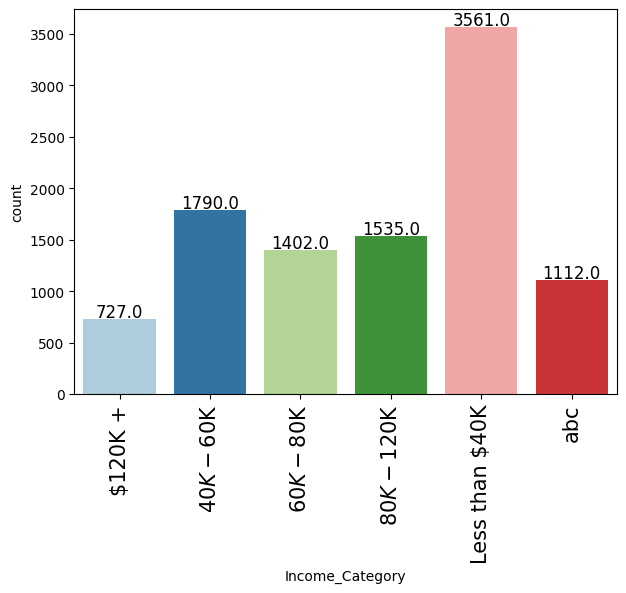

In [ ]:
# Income_Category
labeled_barplot(data, "Income_Category")

* Majority of customers make Less than 40,000
* There are 1112 customers are an incorrectly catagorized. Will need to handel later

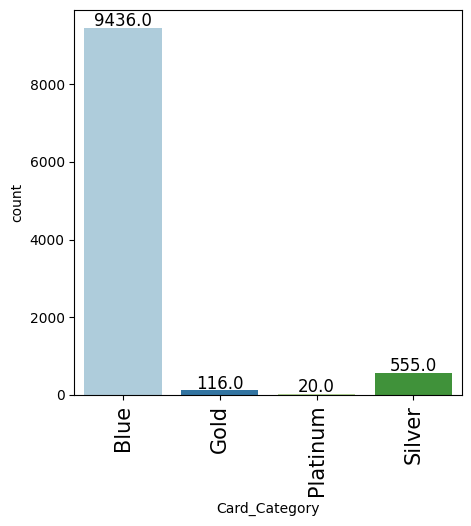

In [ ]:
# Card_Category
labeled_barplot(data, "Card_Category")

* Majority of Customers have a Card in the Blue Category

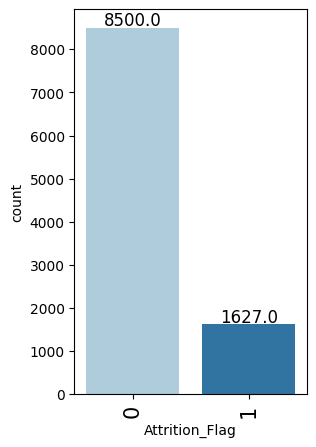

In [ ]:
# Attrition_Flag
labeled_barplot(data, "Attrition_Flag")

* Most customers are Existing Customers as shown by the 0.

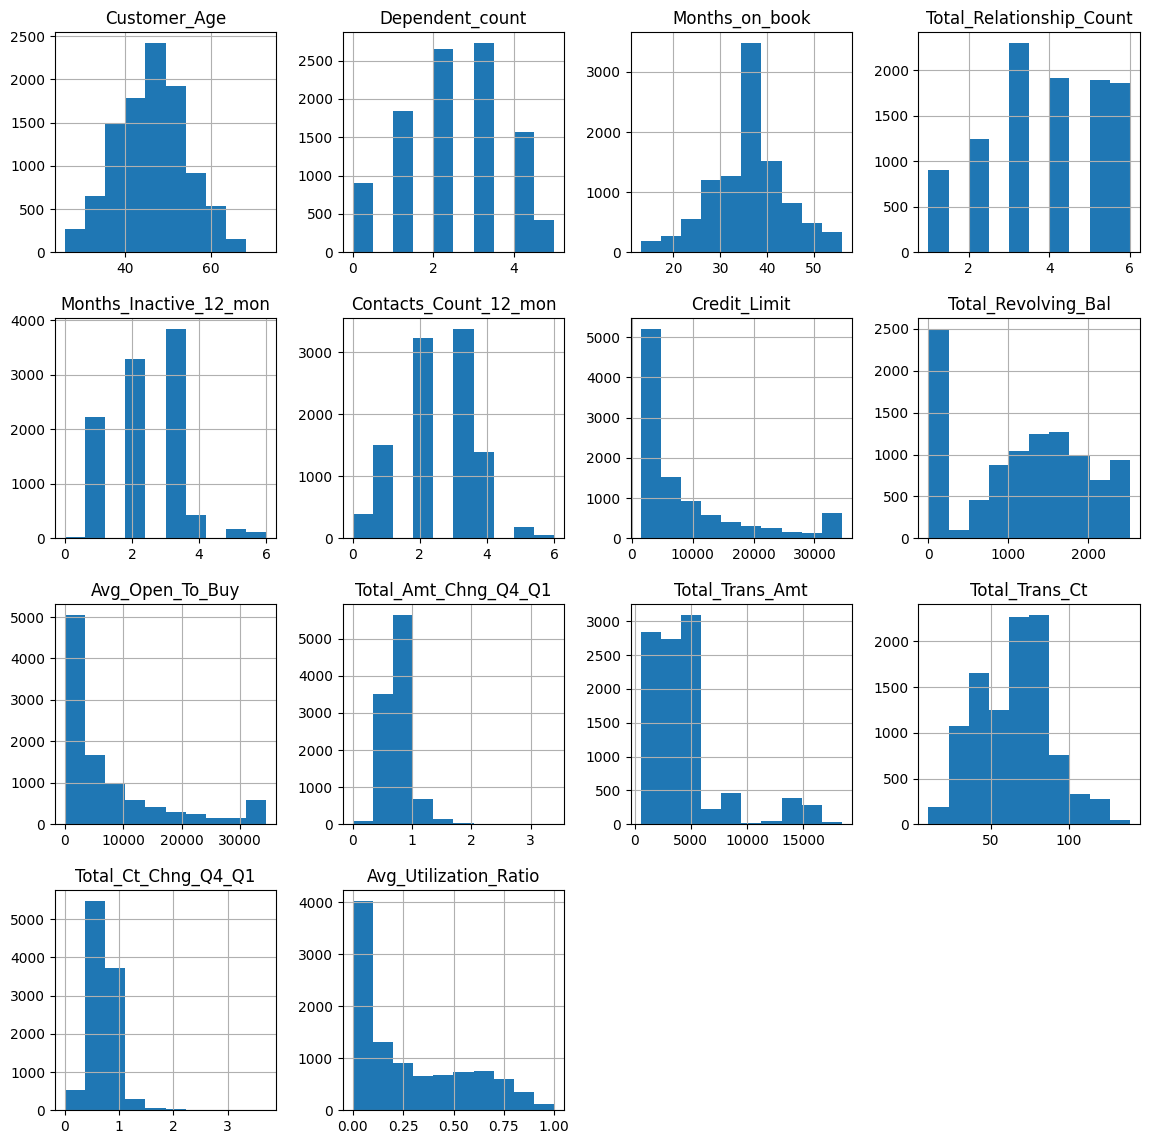

In [ ]:
# creating histograms
data.hist(figsize=(14, 14))
plt.show()

### Bivariate Distributions

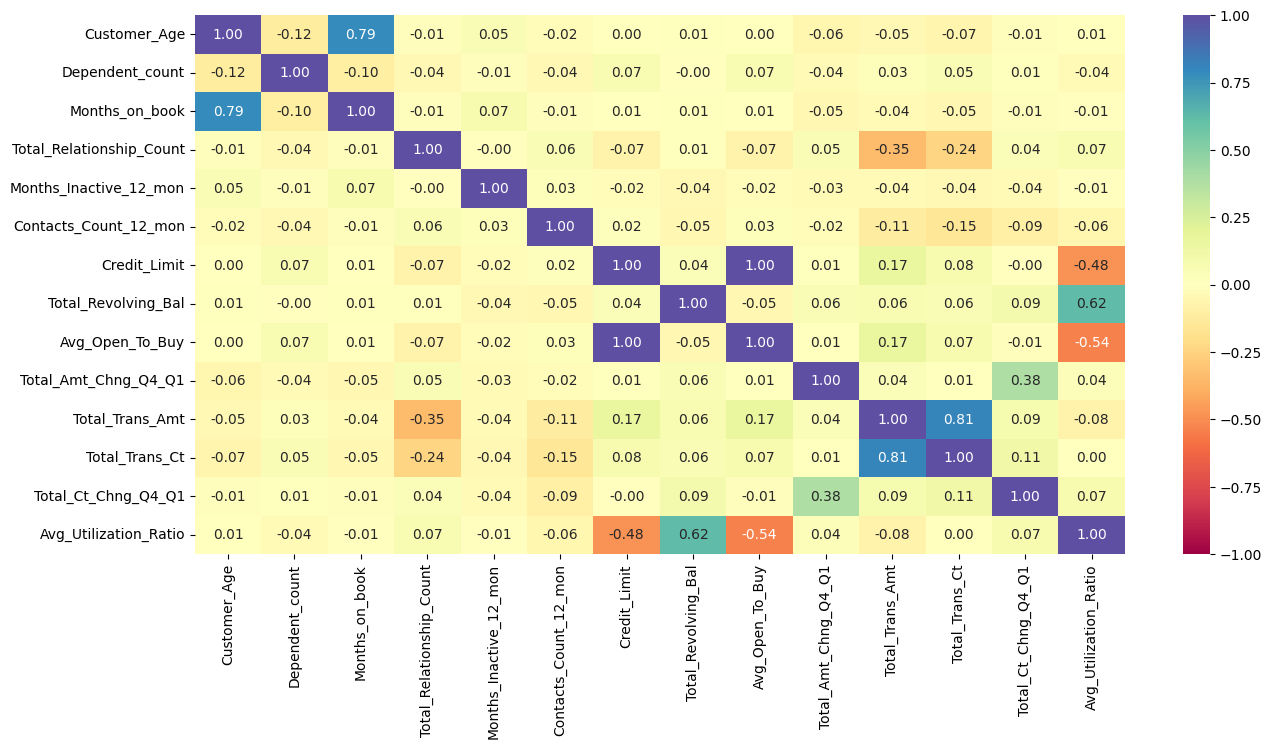

In [ ]:
# Correlation Check

plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(numeric_only = True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Positive Correlations:**
* Customer_Age vs Months_on_book(0.79)
* Total_Revolving_Bal vs Avg_Utilization_Ratio (0.62)
* Total_Trans_Amt vs Total_Trans_CT(0.81)


**Negative Correlations:**
* Credit_Limit vs Avg_Utilization_Ratio (-0.48)
* Avg_Open_To_Buy vs Avg_Utilization_Ratio (-0.54)



Attrition_Flag     0     1    All
Gender                           
All             8500  1627  10127
F               4428   930   5358
M               4072   697   4769
------------------------------------------------------------------------------------------------------------------------


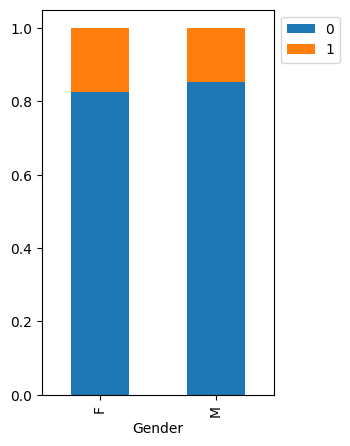

In [ ]:
# Attrition_Flag vs Gender
stacked_barplot(data, "Gender", "Attrition_Flag")

* Of the genders, the Females closed their accounts more than Males

* "Existing Customer", 0
* "Attrited Customer", 1

Attrition_Flag     0     1   All
Marital_Status                  
All             7880  1498  9378
Married         3978   709  4687
Single          3275   668  3943
Divorced         627   121   748
------------------------------------------------------------------------------------------------------------------------


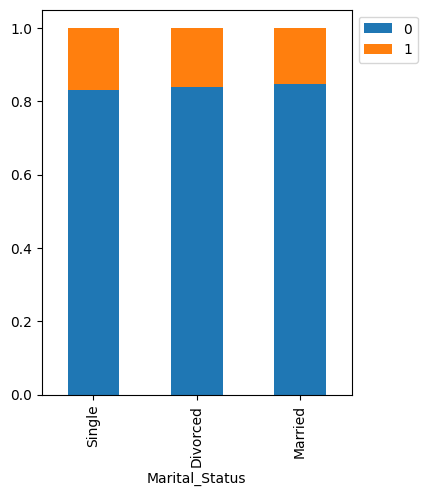

In [ ]:
# Attrition_Flag vs Marital_Status
stacked_barplot(data, "Marital_Status", "Attrition_Flag")

* There is no real difference in Attrition among Marital_Status

Attrition_Flag      0     1   All
Education_Level                  
All              7237  1371  8608
Graduate         2641   487  3128
High School      1707   306  2013
Uneducated       1250   237  1487
College           859   154  1013
Doctorate         356    95   451
Post-Graduate     424    92   516
------------------------------------------------------------------------------------------------------------------------


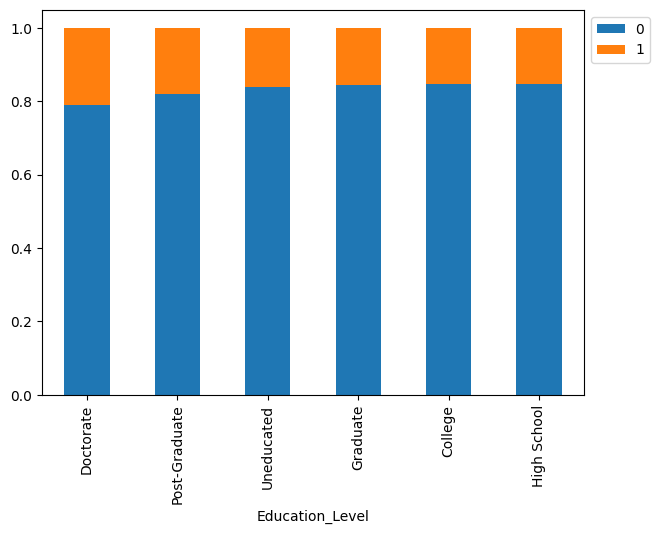

In [ ]:
# Attrition_Flag vs Education_Level
stacked_barplot(data, "Education_Level", "Attrition_Flag")

* Customers with a Doctorate or Post_Graduate education level are more likely to close their accounts

Attrition_Flag     0     1    All
Card_Category                    
All             8500  1627  10127
Blue            7917  1519   9436
Silver           473    82    555
Gold              95    21    116
Platinum          15     5     20
------------------------------------------------------------------------------------------------------------------------


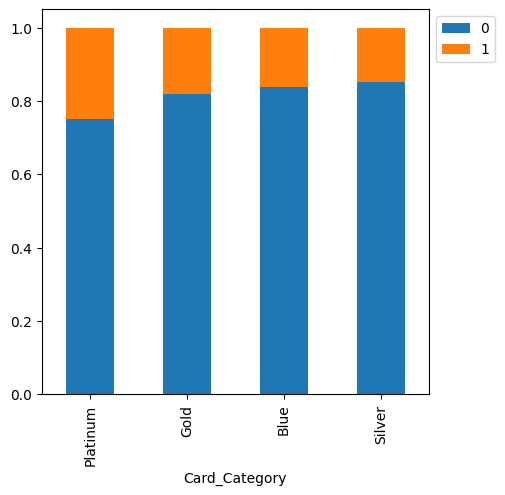

In [ ]:
# Attrition_Flag vs Card_Category
stacked_barplot(data, "Card_Category", "Attrition_Flag")

* Customers in the Platinum card category are the most likely to leave the bank.
* Customers in Blue and Silver Card Categories are the most likely to stay with the bank as existing customers

Attrition_Flag      0     1    All
Income_Category                   
All              8500  1627  10127
Less than $40K   2949   612   3561
$40K - $60K      1519   271   1790
$80K - $120K     1293   242   1535
$60K - $80K      1213   189   1402
abc               925   187   1112
$120K +           601   126    727
------------------------------------------------------------------------------------------------------------------------


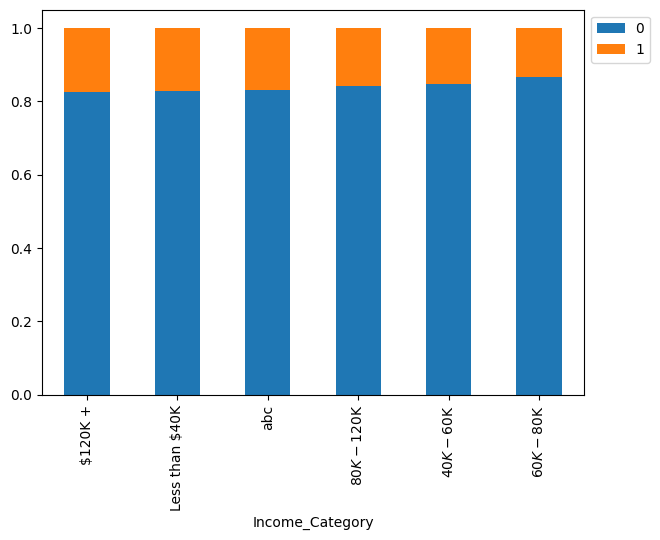

In [ ]:
# Attrition_Flag vs Income_Category
stacked_barplot(data, "Income_Category", "Attrition_Flag")

* There seems to be no huge variation between Attrition_Flag and Income_Category

Attrition_Flag            0     1    All
Contacts_Count_12_mon                   
All                    8500  1627  10127
3                      2699   681   3380
2                      2824   403   3227
4                      1077   315   1392
1                      1391   108   1499
5                       117    59    176
6                         0    54     54
0                       392     7    399
------------------------------------------------------------------------------------------------------------------------


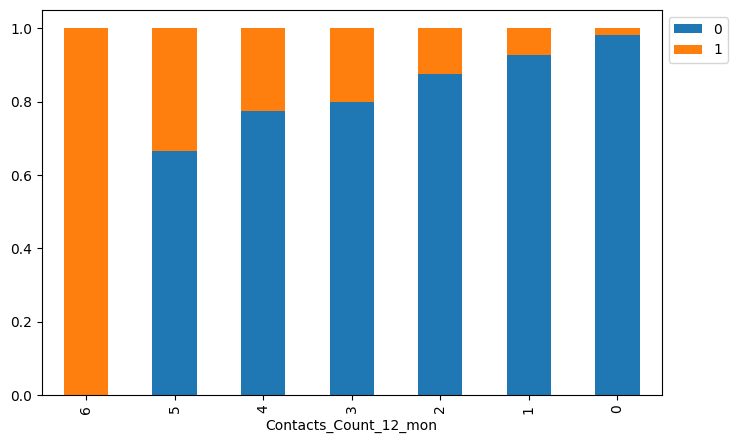

In [ ]:
# Attrition_Flag vs Contacts_Count_12_mon
stacked_barplot(data, "Contacts_Count_12_mon", "Attrition_Flag")

* It seems that as customers have more contact with the bank, they are more likely to close their accounts.
* Going to assume that customers might be dealing with service or a problem and have been trying to fix it with the bank before they give up and close it. That results in multiple contacts and a loss in customers

Attrition_Flag             0     1    All
Months_Inactive_12_mon                   
All                     8500  1627  10127
3                       3020   826   3846
2                       2777   505   3282
4                        305   130    435
1                       2133   100   2233
5                        146    32    178
6                        105    19    124
0                         14    15     29
------------------------------------------------------------------------------------------------------------------------


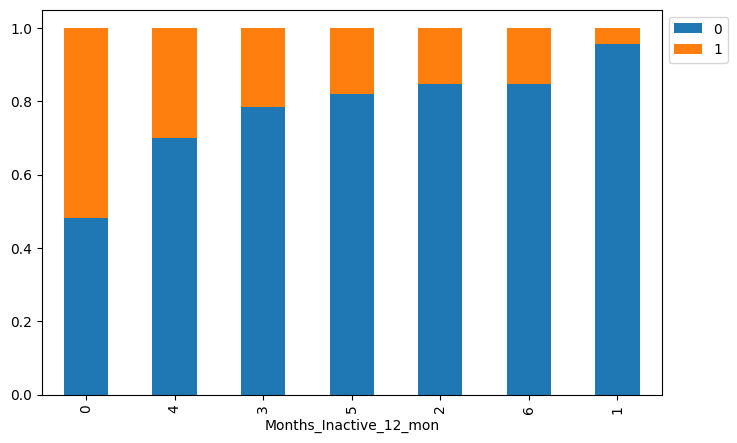

In [ ]:
# Attrition_Flag vs Months_Inactive_12_mon
stacked_barplot(data, "Months_Inactive_12_mon", "Attrition_Flag")

* It seems as customers have 0 months of inacative time, Customers are more likely to close their accounts. The next number of months where customers are more likely to close their account is at 4 months of inactive time.

Attrition_Flag               0     1    All
Total_Relationship_Count                   
All                       8500  1627  10127
3                         1905   400   2305
2                          897   346   1243
1                          677   233    910
5                         1664   227   1891
4                         1687   225   1912
6                         1670   196   1866
------------------------------------------------------------------------------------------------------------------------


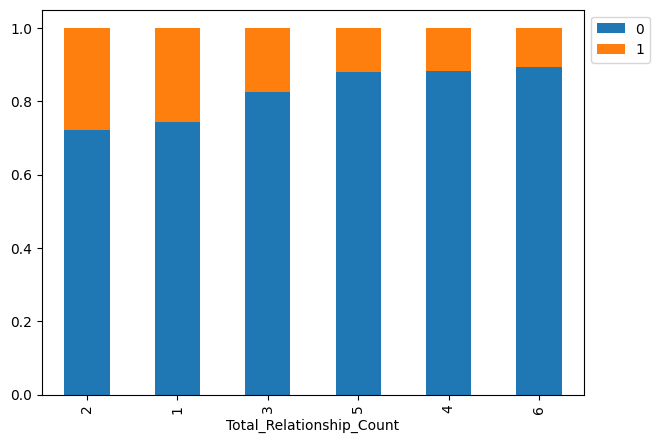

In [ ]:
# Attrition_Flag vs Total_Relationship_Count
stacked_barplot(data, "Total_Relationship_Count", "Attrition_Flag")

* Customers with 4, 5 and 6 products are most likely to remain existing customers.
* The customers with 1 or 2 products are more likely to close their accounts with the bank

Attrition_Flag      0     1    All
Dependent_count                   
All              8500  1627  10127
3                2250   482   2732
2                2238   417   2655
1                1569   269   1838
4                1314   260   1574
0                 769   135    904
5                 360    64    424
------------------------------------------------------------------------------------------------------------------------


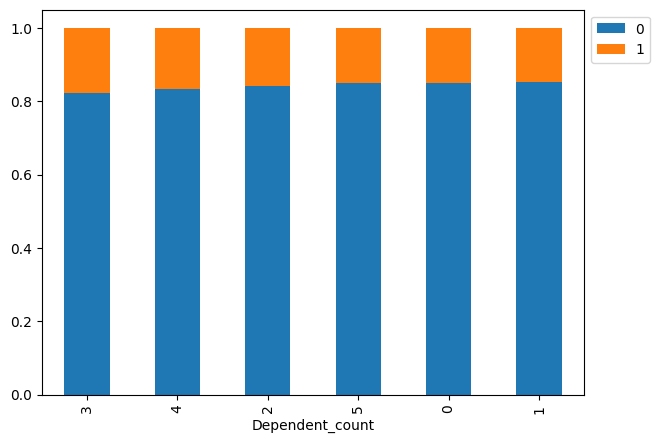

In [ ]:
# Attrition_Flag vs Dependent_Count
stacked_barplot(data, "Dependent_count", "Attrition_Flag")

* Dependent_Count really doesn't effect Attrition_Flag

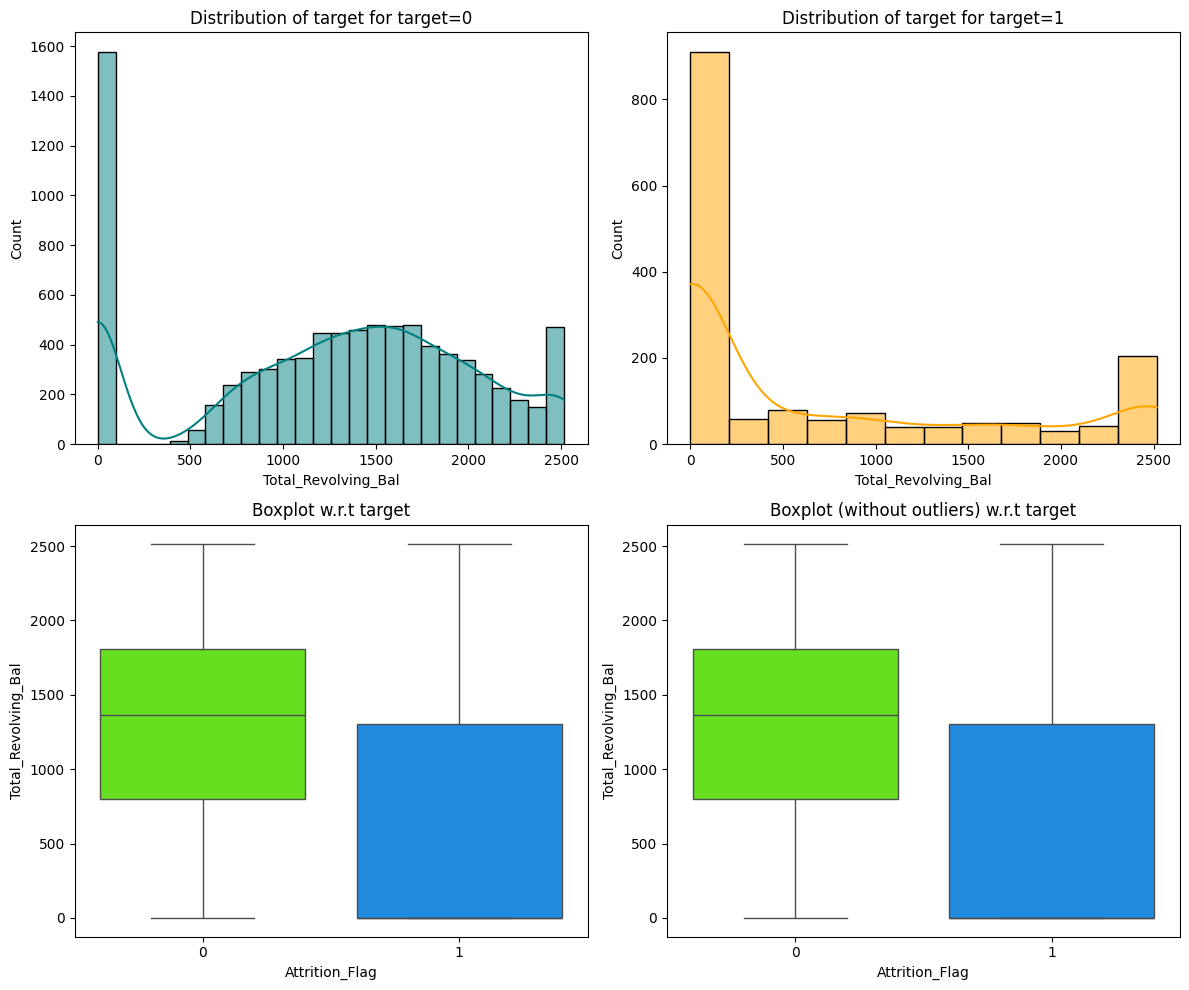

In [ ]:
# Attrition_Flag vs Total_Revolving_Bal
distribution_plot_wrt_target(data, "Total_Revolving_Bal", "Attrition_Flag")

* For customers who are existing customers (Attrition_Flag=0), majority of customers have a Revolving Balance of 0 but more variation in customer balances in this group.
* For customers who are no longer customers (Attrition_Flag=1), majority of customers have a Revolving Balance of 0. The 2nd largest number of customers have a balance around 2500.

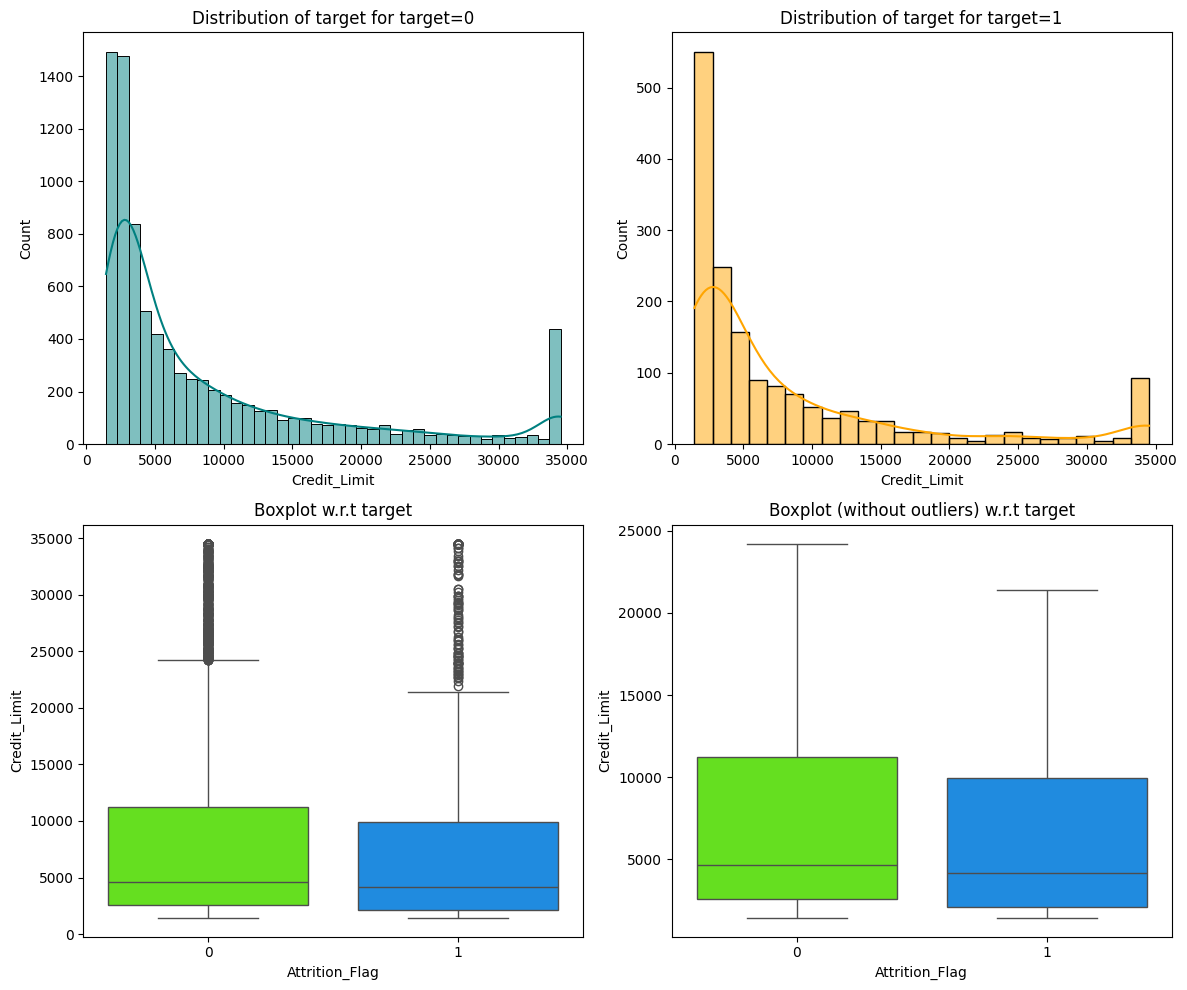

In [ ]:
# Attrition_Flag vs Credit_Limit
distribution_plot_wrt_target(data, "Credit_Limit", "Attrition_Flag")

* Credit Limit is skewed right with loyal customers tending to on average have a higher credit score.
* It can be seen that some of the customers who have left had a high credit limit making me think they defaulted and the card was closed.

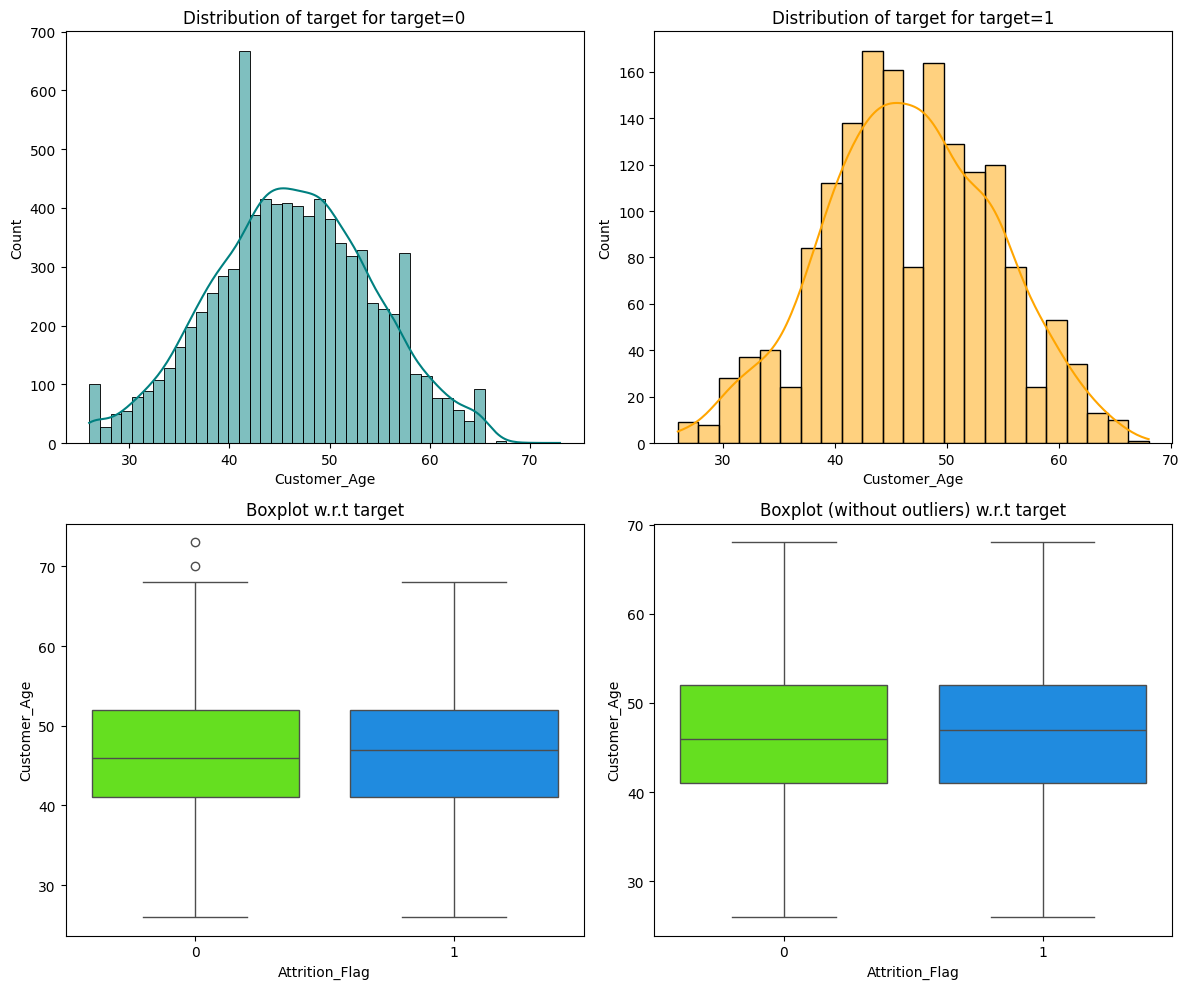

In [ ]:
# Attrition_Flg vs Customer_Age
distribution_plot_wrt_target(data, "Customer_Age", "Attrition_Flag")

* For Existing customers, the most common age is around 42 which Attrited customers have a most common ages of 42 and 48.

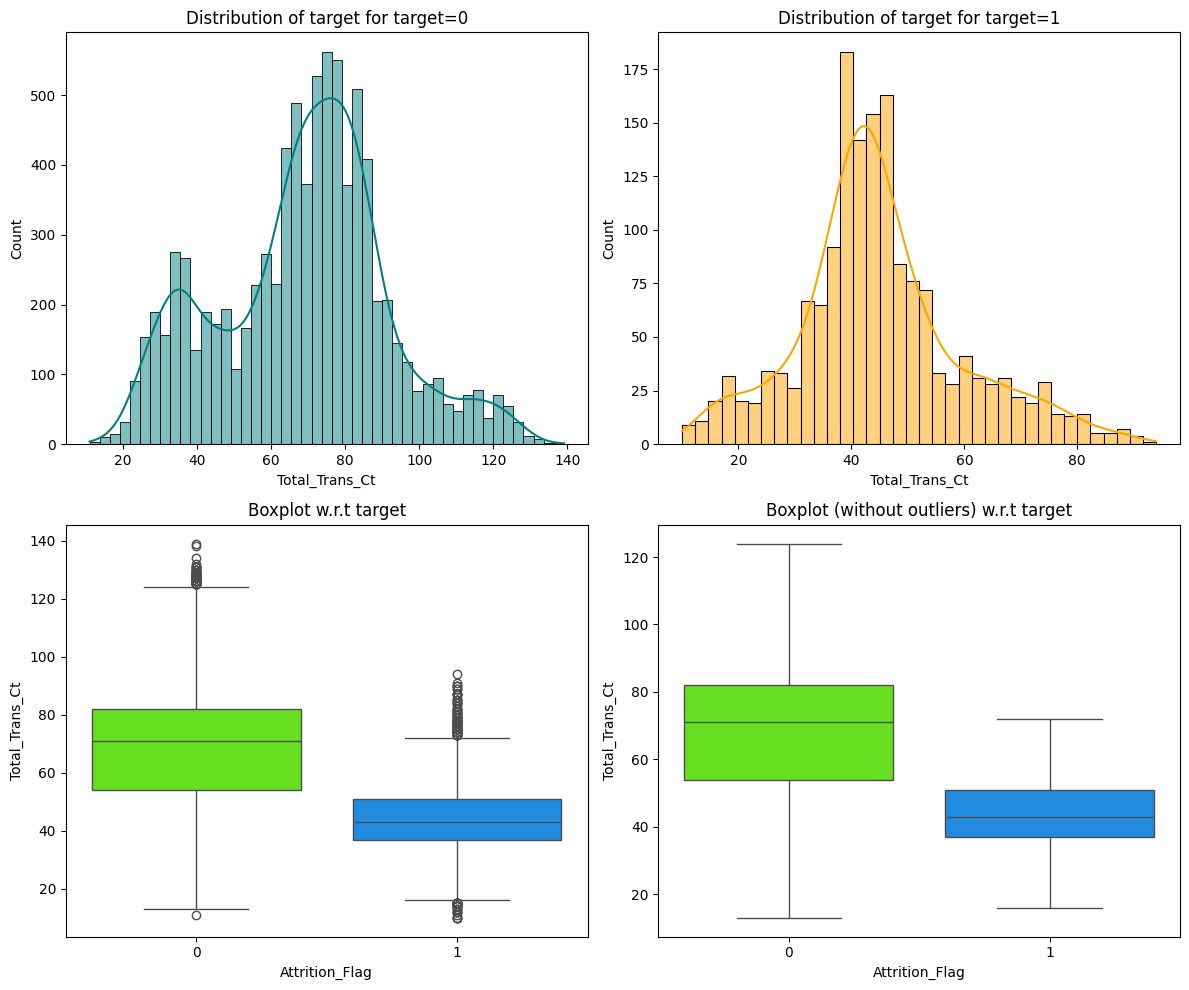

In [ ]:
# Attrition_Flag vs Total_Trans_Ct
distribution_plot_wrt_target(data, "Total_Trans_Ct", "Attrition_Flag")

* Total Trans Ct for customers who are existing, the number of transactions on average are more than customers who have Attrited.

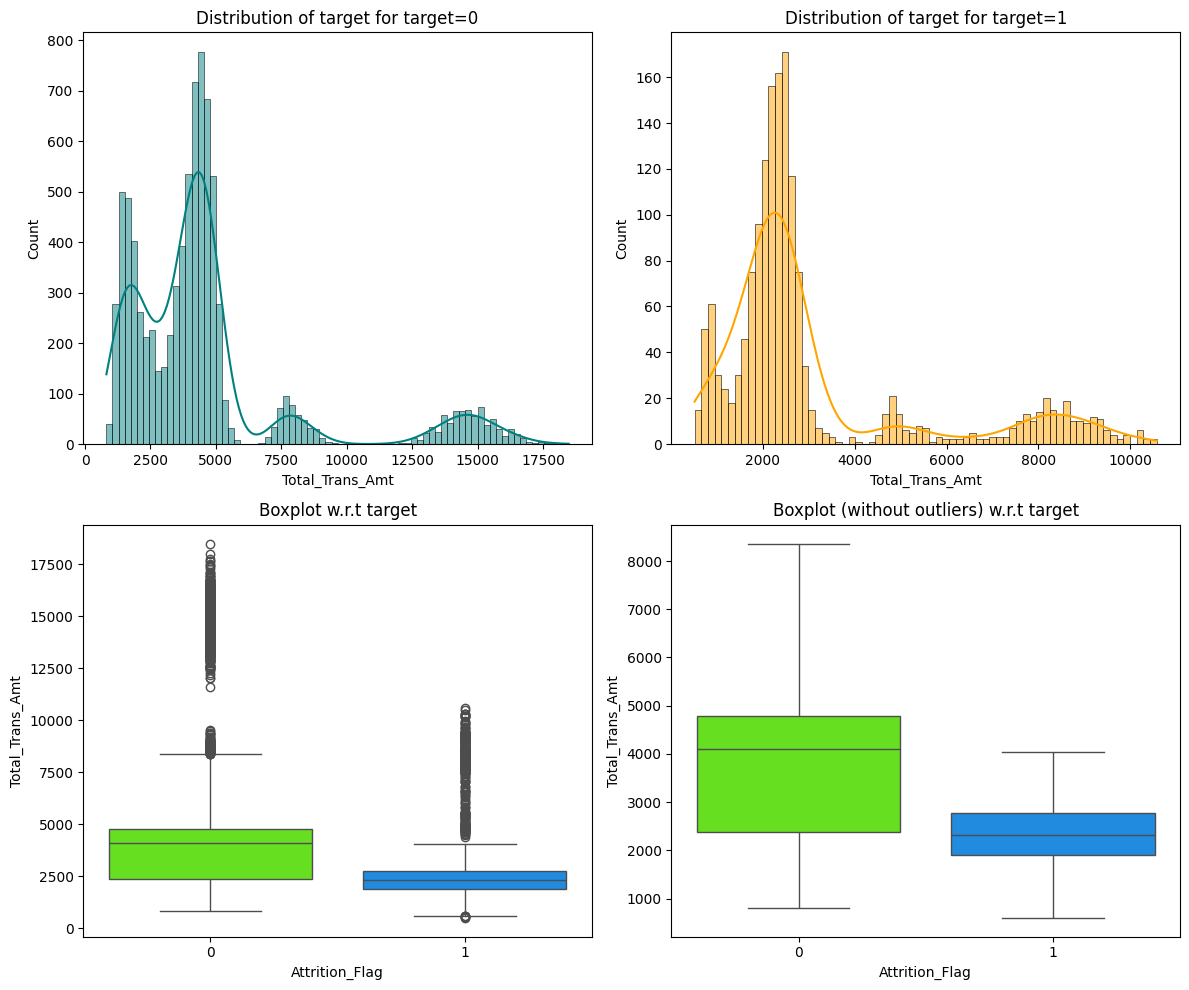

In [ ]:
# Attrition_Flag vs Total_Trans_Amt
distribution_plot_wrt_target(data, "Total_Trans_Amt", "Attrition_Flag")

* For existing customers, transaction amounts peak around 1500 and around 4000.
* For customers who have Attrited, Total Transaction Amounts on average tend to be lower

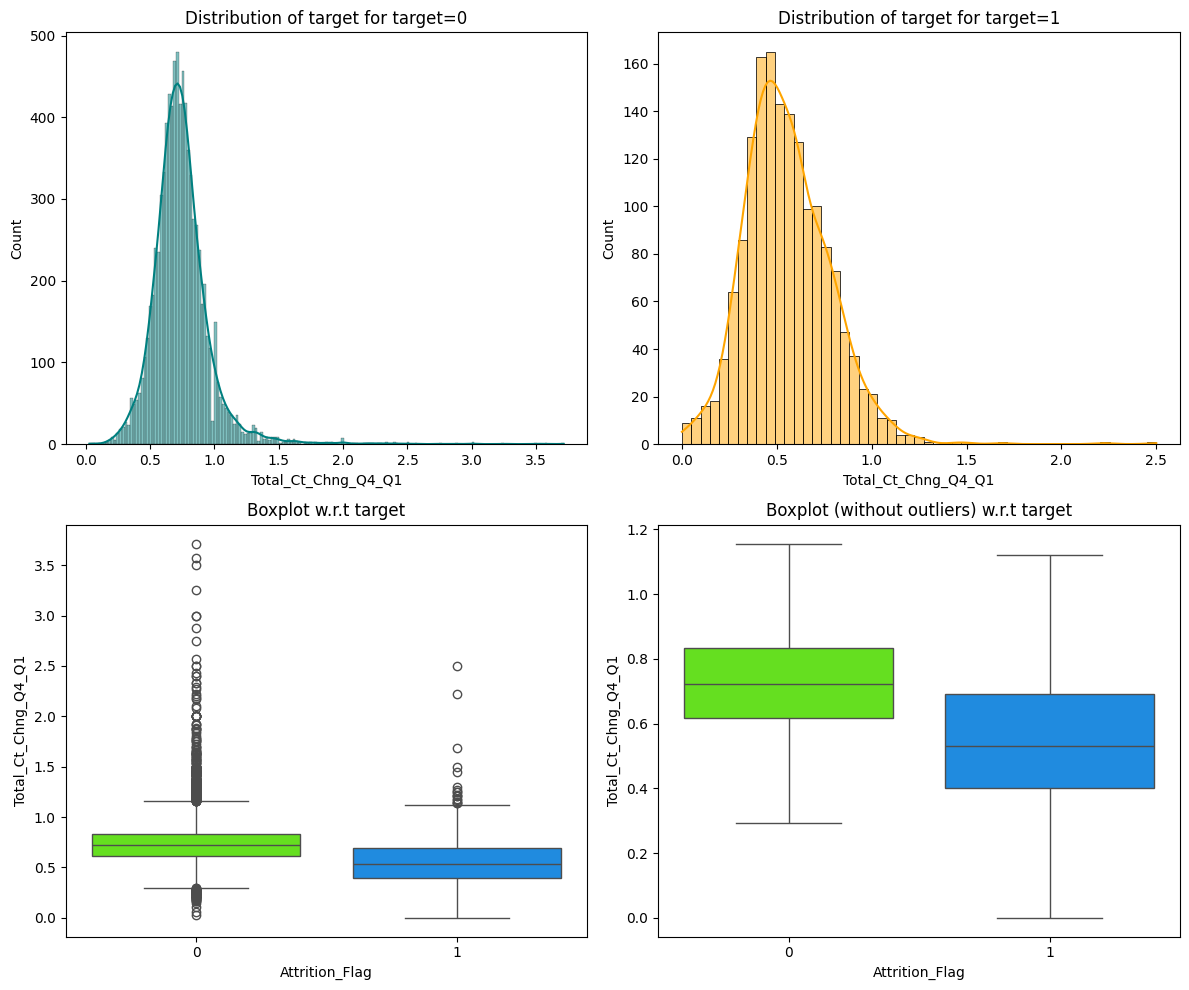

In [ ]:
# Attrition_Flag vs Total_Ct_Chng_Q4_Q1
distribution_plot_wrt_target(data, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag")

* Existing customers on average have a higher Total_Ct_Chng_Q4_Q1 in comparison to customers who have left the bank

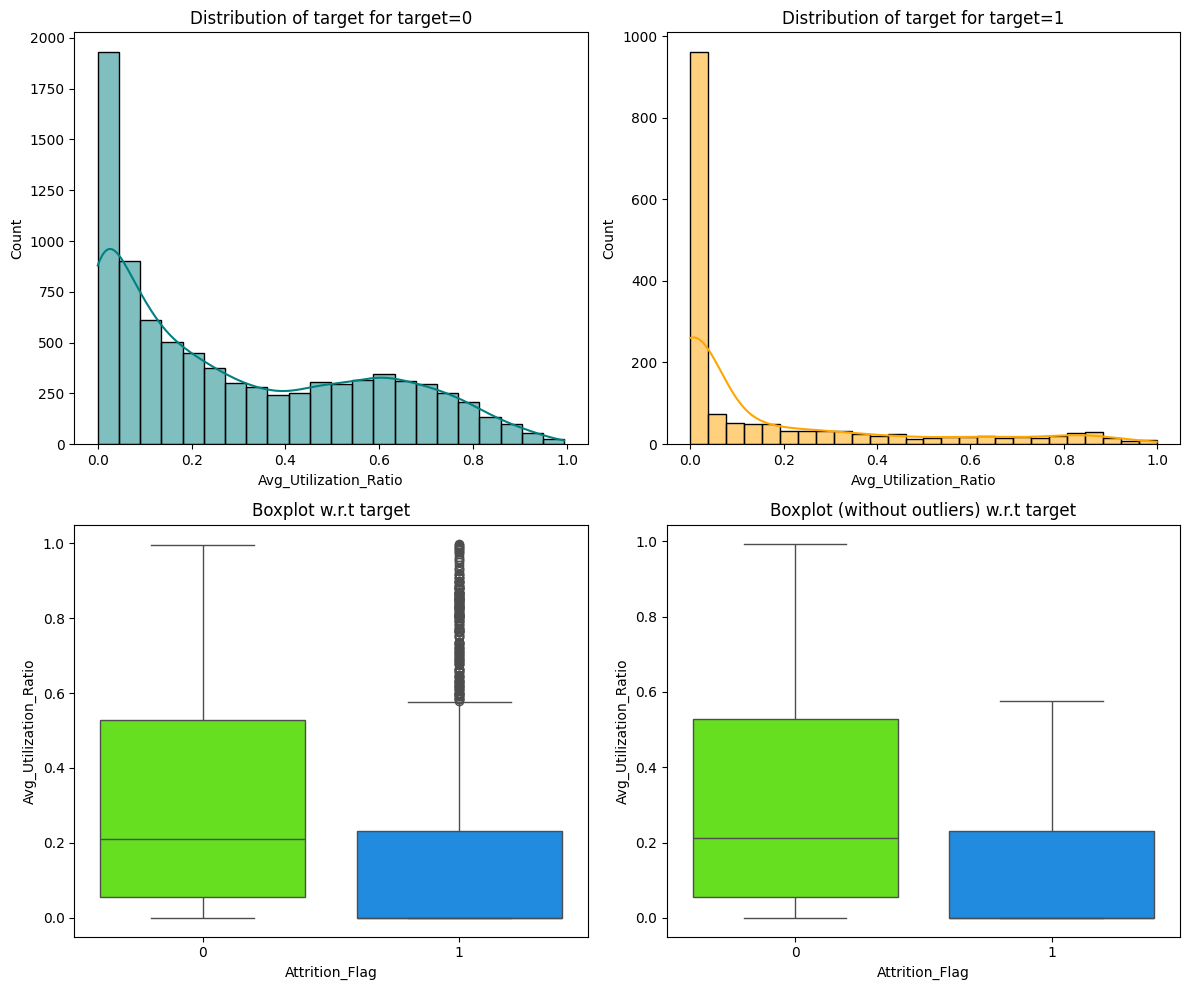

In [ ]:
# Attrition_Flag vs Avg_Utilization_Ratio
distribution_plot_wrt_target(data, "Avg_Utilization_Ratio", "Attrition_Flag")

* A large number of Attrited customers have a Avg Utilization Ratio of 0. This could indicate that they aren't even using the card

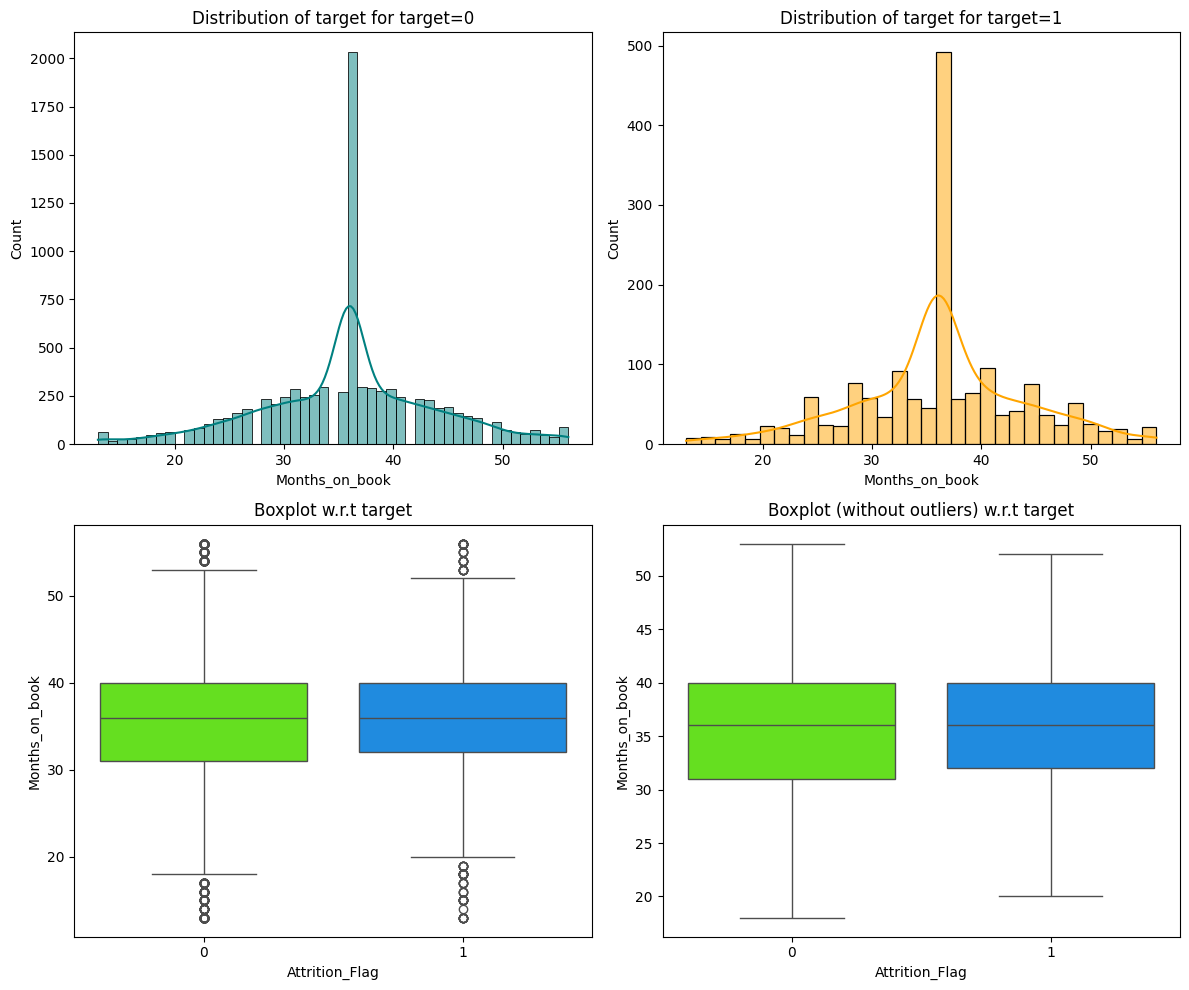

In [ ]:
# Attrition_Flag vs Months_on_book
distribution_plot_wrt_target(data, "Months_on_book", "Attrition_Flag")

* For months on the book, the average number of months for both existing and attrition customers is very similar around 37 months. The Range for existing customers on the books is much larger than customers who have attrited.

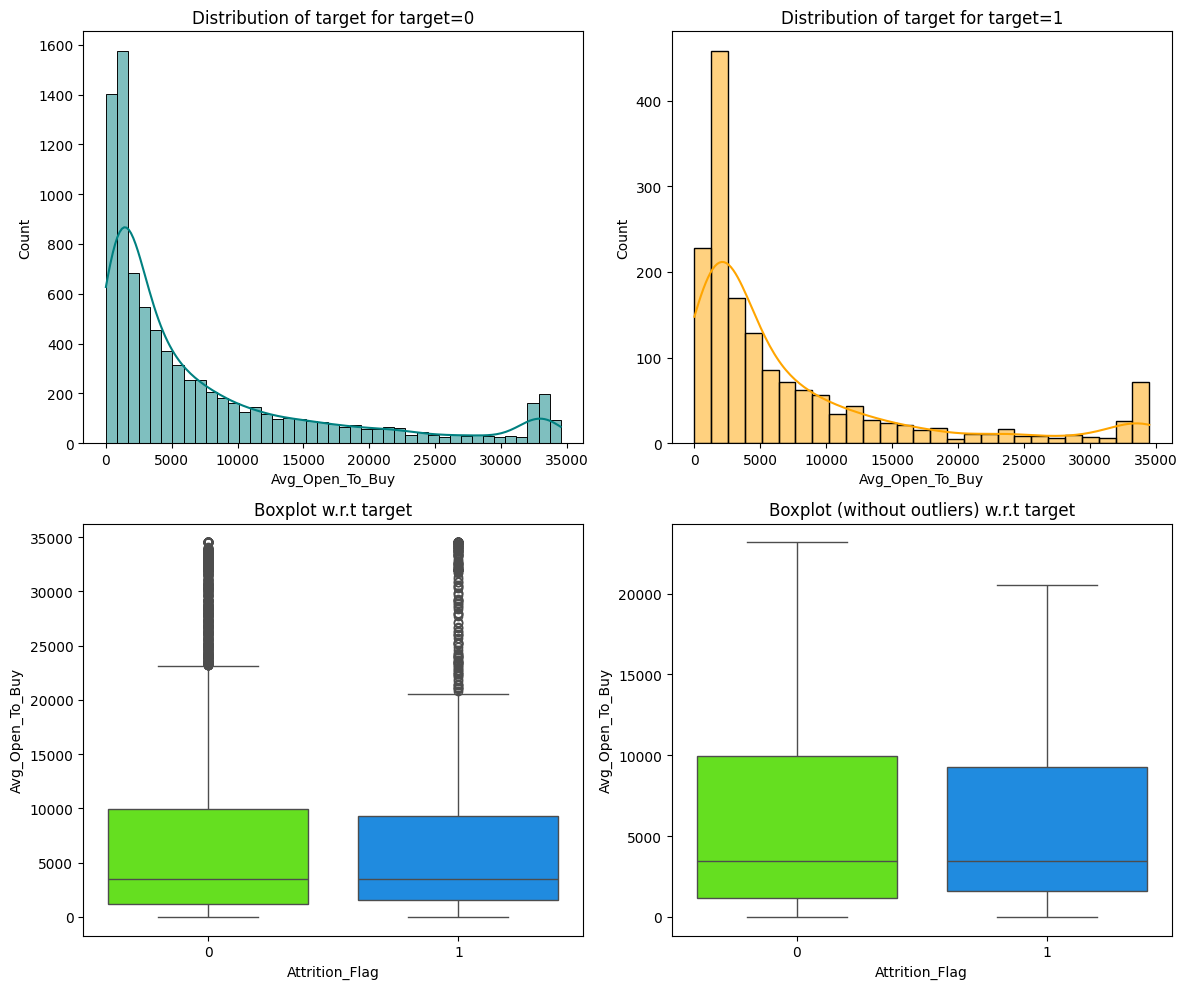

In [ ]:
# Attrition_Flag vs Avg_Open_To_Buy
distribution_plot_wrt_target(data, "Avg_Open_To_Buy", "Attrition_Flag")

* The Average for Avg_Open_To_Buy is about the same for Attrition = 0 and Attrition = 1.

## Data Pre-processing

### Outlier Detection

In [ ]:
data.dtypes


,0
Attrition_Flag,category
Customer_Age,int64
Gender,category
Dependent_count,int64
Education_Level,category
Marital_Status,category
Income_Category,category
Card_Category,category
Months_on_book,int64
Total_Relationship_Count,int64


In [ ]:
# Select only numeric columns
numeric_columns = data.select_dtypes(include=['number'])


In [ ]:
Q1 = numeric_columns.quantile(0.25)  # To find the 25th percentile
Q3 = numeric_columns.quantile(0.75)  # To find the 75th percentile

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

# Finding lower and upper bounds for all values. All values outside these bounds are outliers
lower = (Q1 - 1.5 * IQR)
upper = (Q3 + 1.5 * IQR)

In [ ]:
# checking the % outliers
((data.select_dtypes(include=["float64", "int64"]) < lower) | (data.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(data) * 100

,0
Customer_Age,0.020
Dependent_count,0.000
Months_on_book,3.812
Total_Relationship_Count,0.000
Months_Inactive_12_mon,3.268
Contacts_Count_12_mon,6.211
Credit_Limit,9.717
Total_Revolving_Bal,0.000
Avg_Open_To_Buy,9.509
Total_Amt_Chng_Q4_Q1,3.910


None of these outliers seem to be in error. It could just be the case that some customers make more money than others, some customers have larger Credit Limits and rely less on Credit Cards or they pay them off every month. The money habits for the customers are greatly varied.

## Missing value imputation




In [ ]:
# recheck missing values
data.isnull().sum()

,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,1519
Marital_Status,749
Income_Category,0
Card_Category,0
Months_on_book,0
Total_Relationship_Count,0


In [ ]:
data.Income_Category.unique()

['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K', '$120K +', 'abc']
Categories (6, object): ['$120K +', '$40K - $60K', '$60K - $80K', '$80K - $120K',
                         'Less than $40K', 'abc']

* Education_Level and Marital_Status both show missing values. I also know from earlier exploration, that Income_Category also had a weird category. I would consider that a missing values as well.
* Since Education_Level, Marital_Status and Income_Category are all categories, I think the best approach is to take the mode to replace the missing or misslabeled numbers.
* Need to convert Income_Category 'abc' to null/nan before using the imputer

In [ ]:
# convert Income_Category 'abc' to null
data['Income_Category'].replace('abc', np.nan, inplace=True)

In [ ]:
data.isnull().sum()

,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,1519
Marital_Status,749
Income_Category,1112
Card_Category,0
Months_on_book,0
Total_Relationship_Count,0


* Nulls are now visible in `Education_Level`, `Martial_Status`, and `Income_Category`

In [ ]:
# instance of imputer
imputer = SimpleImputer(strategy='most_frequent')

In [ ]:
# columns to impute - replace null values with mode
col_to_impute = ['Education_Level', 'Marital_Status', 'Income_Category']

In [ ]:
# Divide train data into x and y

# drop target variable
X = data.drop(['Attrition_Flag'], axis=1)

# create target feature
y= data['Attrition_Flag']

In [ ]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 19) (2026, 19) (2026, 19)


In [ ]:
# fit the imputer on train data and transform the train data
X_train[col_to_impute] = imputer.fit_transform(X_train[col_to_impute])

# Transform the validation data
X_val[col_to_impute]=imputer.fit_transform(X_val[col_to_impute])

# Transform the test data
X_test[col_to_impute] = imputer.fit_transform(X_test[col_to_impute])

In [ ]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

In [ ]:
# Checking class balance for whole data, train set, validation set, and test set

print("Target value ratio in y")
print(y.value_counts(1))
print("*" * 80)
print("Target value ratio in y_train")
print(y_train.value_counts(1))
print("*" * 80)
print("Target value ratio in y_val")
print(y_val.value_counts(1))
print("*" * 80)
print("Target value ratio in y_test")
print(y_test.value_counts(1))
print("*" * 80)

Target value ratio in y
Attrition_Flag
0   0.839
1   0.161
Name: proportion, dtype: float64
********************************************************************************
Target value ratio in y_train
Attrition_Flag
0   0.839
1   0.161
Name: proportion, dtype: float64
********************************************************************************
Target value ratio in y_val
Attrition_Flag
0   0.839
1   0.161
Name: proportion, dtype: float64
********************************************************************************
Target value ratio in y_test
Attrition_Flag
0   0.840
1   0.160
Name: proportion, dtype: float64
********************************************************************************


In [ ]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

Gender
F    3193
M    2882
Name: count, dtype: int64
******************************
Education_Level
Graduate         2782
High School      1228
Uneducated        881
College           618
Post-Graduate     312
Doctorate         254
Name: count, dtype: int64
******************************
Marital_Status
Married     3276
Single      2369
Divorced     430
Name: count, dtype: int64
******************************
Income_Category
Less than $40K    2783
$40K - $60K       1059
$80K - $120K       953
$60K - $80K        831
$120K +            449
Name: count, dtype: int64
******************************
Card_Category
Blue        5655
Silver       339
Gold          69
Platinum      12
Name: count, dtype: int64
******************************


In [ ]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

Gender
F    1095
M     931
Name: count, dtype: int64
******************************
Education_Level
Graduate         917
High School      404
Uneducated       306
College          199
Post-Graduate    101
Doctorate         99
Name: count, dtype: int64
******************************
Marital_Status
Married     1100
Single       770
Divorced     156
Name: count, dtype: int64
******************************
Income_Category
Less than $40K    957
$40K - $60K       361
$80K - $120K      293
$60K - $80K       279
$120K +           136
Name: count, dtype: int64
******************************
Card_Category
Blue        1905
Silver        97
Gold          21
Platinum       3
Name: count, dtype: int64
******************************


In [ ]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

Gender
F    3193
M    2882
Name: count, dtype: int64
******************************
Education_Level
Graduate         2782
High School      1228
Uneducated        881
College           618
Post-Graduate     312
Doctorate         254
Name: count, dtype: int64
******************************
Marital_Status
Married     3276
Single      2369
Divorced     430
Name: count, dtype: int64
******************************
Income_Category
Less than $40K    2783
$40K - $60K       1059
$80K - $120K       953
$60K - $80K        831
$120K +            449
Name: count, dtype: int64
******************************
Card_Category
Blue        5655
Silver       339
Gold          69
Platinum      12
Name: count, dtype: int64
******************************


In [ ]:
# Creating dummy variables for category
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 29) (2026, 29) (2026, 29)


* After encoding there are 29 columns

In [ ]:
# check the top 5 rows from the train dataset
X_train.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
800,40,2,21,6,4,3,20056.000,1602,18454.000,0.466,1687,46,0.533,0.080,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False
498,44,1,34,6,2,0,2885.000,1895,990.000,0.387,1366,31,0.632,0.657,True,False,True,False,False,False,True,False,False,False,False,True,False,False,False
4356,48,4,36,5,1,2,6798.000,2517,4281.000,0.873,4327,79,0.881,0.370,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False
407,41,2,36,6,2,0,27000.000,0,27000.000,0.610,1209,39,0.300,0.000,True,False,True,False,False,False,True,False,False,True,False,False,False,False,True
8728,46,4,36,2,2,3,15034.000,1356,13678.000,0.754,7737,84,0.750,0.090,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True


### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want **Recall** to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

### Model Building with original data

Running test train split with original data on the models to gain a starting point. I also added Logistic Regression I was just curious about how it might perform

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(n_jobs=-1, eval_metric="auc", random_state=1)))
models.append(("Decision tree", DecisionTreeClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("Logistic regression", LogisticRegression(random_state=1)))

metrics = ["Accuracy", "Recall", "Precision", "F1"]

performance_df_train = pd.DataFrame(columns=['Model'] + metrics)
performance_df_val = pd.DataFrame(columns=['Model'] + metrics)

# print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    perf_df = model_performance_classification_sklearn(model, X_train, y_train)
    perf_df["Model"] = name
    performance_df_train = pd.concat([performance_df_train, perf_df], ignore_index=True)

# print("\n" "Validation Performance:" "\n")
for name, model in models:
    perf_df = model_performance_classification_sklearn(model, X_val, y_val)
    perf_df["Model"] = name
    performance_df_val = pd.concat([performance_df_val, perf_df], ignore_index=True)

# Displaying the performance metrics DataFrame
print("Training Performance:\n")
print(performance_df_train)
print("\nValidation Performance:\n")
print(performance_df_val)

Training Performance:

                 Model  Accuracy  Recall  Precision    F1
0              Bagging     0.997   0.986      0.997 0.991
1        Random forest     1.000   1.000      1.000 1.000
2                  GBM     0.973   0.875      0.952 0.912
3              XGBoost     1.000   1.000      1.000 1.000
4        Decision tree     1.000   1.000      1.000 1.000
5             AdaBoost     0.957   0.827      0.900 0.862
6  Logistic regression     0.884   0.417      0.747 0.535

Validation Performance:

                 Model  Accuracy  Recall  Precision    F1
0              Bagging     0.956   0.813      0.904 0.856
1        Random forest     0.957   0.798      0.922 0.855
2                  GBM     0.967   0.856      0.936 0.894
3              XGBoost     0.971   0.902      0.919 0.910
4        Decision tree     0.939   0.816      0.806 0.811
5             AdaBoost     0.962   0.853      0.906 0.878
6  Logistic regression     0.896   0.488      0.783 0.601


* `Random Forest`, `XGBoost` and `Decision Tree` have perfect results on the Training Performance. This may indicate a case of Overfitting the data.
* `Bagging` looks to be performing consistantly and might be helped with Tuning
* `Gradient Boosting` has consistant numbers through Recall is on the low end
* `Logistic Regression` had some of the worst results of any of the models. It looks like it is underfitting
* `AdaBoost` seems to have performed consistantly and might be helped with Tuned. It looks to be slightly underfitting.  

### Model Building with Oversampled data


In [ ]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print("Before OverSampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, count of label '1': 976
Before OverSampling, count of label '0': 5099 

After Oversampling, counts of label 'Yes': 5099
After Oversampling, counts of label 'No': 5099 

After Oversampling, the shape of train_X: (10198, 29)
After Oversampling, the shape of train_y: (10198,) 



In [ ]:
models_over = []  # Empty list to store all the models

# Appending models into the list
models_over.append(("Bagging", BaggingClassifier(random_state=1)))
models_over.append(("Random forest", RandomForestClassifier(random_state=1)))
models_over.append(("GBM", GradientBoostingClassifier(random_state=1)))
models_over.append(("XGBoost", XGBClassifier(n_jobs=-1, eval_metric="auc", random_state=1)))
models_over.append(("Decision tree", DecisionTreeClassifier(random_state=1)))
models_over.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models_over.append(("Logistic regression", LogisticRegression(random_state=1)))

metrics = ["Accuracy", "Recall", "Precision", "F1"]

performance_df_train_over = pd.DataFrame(columns=['Model'] + metrics)
performance_df_val_over = pd.DataFrame(columns=['Model'] + metrics)

# print("\n" "Training Performance:" "\n")
for name, model in models_over:
    model.fit(X_train_over, y_train_over)
    perf_df = model_performance_classification_sklearn(model, X_train_over, y_train_over)
    perf_df["Model"] = name
    performance_df_train_over = pd.concat([performance_df_train_over, perf_df], ignore_index=True)

# print("\n" "Validation Performance:" "\n")
for name, model in models_over:
    perf_df = model_performance_classification_sklearn(model, X_val, y_val)
    perf_df["Model"] = name
    performance_df_val_over = pd.concat([performance_df_val_over, perf_df], ignore_index=True)

# Displaying the performance metrics DataFrame
print("Training Performance:\n")
print(performance_df_train_over)
print("\nValidation Performance:\n")
print(performance_df_val_over)

Training Performance:

                 Model  Accuracy  Recall  Precision    F1
0              Bagging     0.998   0.998      0.999 0.998
1        Random forest     1.000   1.000      1.000 1.000
2                  GBM     0.976   0.979      0.972 0.976
3              XGBoost     1.000   1.000      1.000 1.000
4        Decision tree     1.000   1.000      1.000 1.000
5             AdaBoost     0.960   0.965      0.956 0.960
6  Logistic regression     0.800   0.802      0.798 0.800

Validation Performance:

                 Model  Accuracy  Recall  Precision    F1
0              Bagging     0.947   0.862      0.817 0.839
1        Random forest     0.954   0.862      0.852 0.857
2                  GBM     0.957   0.905      0.840 0.871
3              XGBoost     0.971   0.929      0.894 0.911
4        Decision tree     0.934   0.865      0.760 0.809
5             AdaBoost     0.946   0.902      0.790 0.842
6  Logistic regression     0.799   0.779      0.431 0.555


* `Random Forest`, `XGBoost` and `Decision Tree` are all showing signs of overfitting.
* `Bagging`, `GBM` and `AdaBoost` are still performing pretty well.
* `Bagging` while performing well, do a pretty large hit in the Recall for Validation.
* `XGBoost` of the models with potential for overfitting has the best recall score of the overfitted models.

### Model Building with Undersampled data

In [ ]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 976
Before Under Sampling, counts of label 'No': 5099 

After Under Sampling, counts of label 'Yes': 976
After Under Sampling, counts of label 'No': 976 

After Under Sampling, the shape of train_X: (1952, 29)
After Under Sampling, the shape of train_y: (1952,) 



In [ ]:
models_under = []  # Empty list to store all the models

# Appending models into the list
models_under.append(("Bagging", BaggingClassifier(random_state=1)))
models_under.append(("Random forest", RandomForestClassifier(random_state=1)))
models_under.append(("GBM", GradientBoostingClassifier(random_state=1)))
models_under.append(("XGBoost", XGBClassifier(n_jobs=-1, eval_metric="auc", random_state=1)))
models_under.append(("Decision tree", DecisionTreeClassifier(random_state=1)))
models_under.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models_under.append(("Logistic regression", LogisticRegression(random_state=1)))

metrics = ["Accuracy", "Recall", "Precision", "F1"]

performance_df_train_under = pd.DataFrame(columns=['Model'] + metrics)
performance_df_val_under = pd.DataFrame(columns=['Model'] + metrics)

# print("\n" "Training Performance:" "\n")
for name, model in models_under:
    model.fit(X_train_un, y_train_un)
    perf_df = model_performance_classification_sklearn(model, X_train_un, y_train_un)
    perf_df["Model"] = name
    performance_df_train_under = pd.concat([performance_df_train_under, perf_df], ignore_index=True)

# print("\n" "Validation Performance:" "\n")
for name, model in models_under:
    perf_df = model_performance_classification_sklearn(model, X_val, y_val)
    perf_df["Model"] = name
    performance_df_val_under = pd.concat([performance_df_val_under, perf_df], ignore_index=True)

# Displaying the performance metrics DataFrame
print("Training Performance:\n")
print(performance_df_train_under)
print("\nValidation Performance:\n")
print(performance_df_val_under)

Training Performance:

                 Model  Accuracy  Recall  Precision    F1
0              Bagging     0.995   0.991      1.000 0.995
1        Random forest     1.000   1.000      1.000 1.000
2                  GBM     0.974   0.981      0.969 0.975
3              XGBoost     1.000   1.000      1.000 1.000
4        Decision tree     1.000   1.000      1.000 1.000
5             AdaBoost     0.950   0.953      0.947 0.950
6  Logistic regression     0.813   0.822      0.808 0.815

Validation Performance:

                 Model  Accuracy  Recall  Precision    F1
0              Bagging     0.925   0.929      0.701 0.799
1        Random forest     0.934   0.939      0.729 0.820
2                  GBM     0.935   0.957      0.726 0.825
3              XGBoost     0.944   0.969      0.752 0.847
4        Decision tree     0.895   0.920      0.616 0.738
5             AdaBoost     0.929   0.960      0.705 0.813
6  Logistic regression     0.814   0.825      0.457 0.588


* `Random Forest`, `XGBoost` and `Decision Tree` are all showing signs of overfitting.
* `GBM` and `AdaBoost` seem to be performing the best
* `XGBoost` has the best Recall on the validation set in comparison to all the other models
* `Bagging`  precision has been greatly effected by undersampling of the data


In [ ]:
# View all the metrics combined
# Add a new column 'Set' to each dataframe
performance_df_train["Set"] = "Train"
performance_df_val["Set"] = "Validation"
performance_df_train_over["Set"] = "Train - Oversampled"
performance_df_val_over["Set"] = "Validation - Oversampled"
performance_df_train_under["Set"] = "Train - Undersampled"
performance_df_val_under["Set"] = "Validation - Undersampled"

# Concatenate all dataframes
performance_df_all = pd.concat(
    [
        performance_df_train,
        performance_df_val,
        performance_df_train_over,
        performance_df_val_over,
        performance_df_train_under,
        performance_df_val_under,
    ]
)

# Pivot the dataframe
performance_df_all_pivot = performance_df_all.pivot_table(index="Model", columns="Set")


In [ ]:
performance_df_all_pivot

Accuracy                                           \
Set                    Train Train - Oversampled Train - Undersampled   
Model                                                                   
AdaBoost               0.957               0.960                0.950   
Bagging                0.997               0.998                0.995   
Decision tree          1.000               1.000                1.000   
GBM                    0.973               0.976                0.974   
Logistic regression    0.884               0.800                0.813   
Random forest          1.000               1.000                1.000   
XGBoost                1.000               1.000                1.000   

                                                         \
Set                 Validation Validation - Oversampled   
Model                                                     
AdaBoost                 0.962                    0.946   
Bagging                  0.956                    0.947   
Decision tree            0.939                    0.934   
GBM                      0.967                    0.957   
Logistic regression      0.896                    0.799   
Random forest            0.957                    0.954   
XGBoost                  0.971                    0.971   

                                                 F1                      \
Set                 Validation - Undersampled Train Train - Oversampled   
Model                                                                     
AdaBoost                                0.929 0.862               0.960   
Bagging                                 0.925 0.991               0.998   
Decision tree                           0.895 1.000               1.000   
GBM                                     0.935 0.912               0.976   
Logistic regression                     0.814 0.535               0.800   
Random forest                           0.934 1.000               1.000   
XGBoost                                 0.944 1.000               1.000   

                                                                              \
Set                 Train - Undersampled Validation Validation - Oversampled   
Model                                                                          
AdaBoost                           0.950      0.878                    0.842   
Bagging                            0.995      0.856                    0.839   
Decision tree                      1.000      0.811                    0.809   
GBM                                0.975      0.894                    0.871   
Logistic regression                0.815      0.601                    0.555   
Random forest                      1.000      0.855                    0.857   
XGBoost                            1.000      0.910                    0.911   

                                              Precision                      \
Set                 Validation - Undersampled     Train Train - Oversampled   
Model                                                                         
AdaBoost                                0.813     0.900               0.956   
Bagging                                 0.799     0.997               0.999   
Decision tree                           0.738     1.000               1.000   
GBM                                     0.825     0.952               0.972   
Logistic regression                     0.588     0.747               0.798   
Random forest                           0.820     1.000               1.000   
XGBoost                                 0.847     1.000               1.000   

                                                                              \
Set                 Train - Undersampled Validation Validation - Oversampled   
Model                                                                          
AdaBoost                           0.947      0.906                    0.790   
Bagging                            

### HyperparameterTuning

#### Sample Parameter Grids

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase


- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost (optional):

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

#### Tuning AdaBoost using Orginal Data

* When isolating AdaBoost with undersampling and oversampling, results were consistant with Recall recieving a good boost using undersampling. Running AdaBoost with Original Data to provide baseline.

In [ ]:
from sklearn import metrics

In [ ]:
# define model
base_estimators = [
    ('tree2', DecisionTreeClassifier(max_depth=2)),
    ('tree3', DecisionTreeClassifier(max_depth=3)),
    ('default', None)  # Using the default DecisionTree (max_depth=1)
]

# params to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

for name, base_estimator in base_estimators:
  print(f"Running RandomizedSearchCV for {name} base estimator...")
  model = AdaBoostClassifier(estimator=base_estimator, random_state=1)

  #Calling RandomizedSearchCV
  randomized_cv = RandomizedSearchCV(model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

  #Fitting parameters in RandomizedSearchCV
  randomized_cv.fit(X_train,y_train)

  print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Running RandomizedSearchCV for tree2 base estimator...
Best parameters are {'n_estimators': 100, 'learning_rate': 0.1} with CV score=0.8083882783882783:
Running RandomizedSearchCV for tree3 base estimator...
Best parameters are {'n_estimators': 100, 'learning_rate': 0.1} with CV score=0.8360596546310832:
Running RandomizedSearchCV for default base estimator...
Best parameters are {'n_estimators': 100, 'learning_rate': 0.1} with CV score=0.536865515436944:


In [ ]:
# Creating new pipeline with best parameters
tuned_ada = AdaBoostClassifier( random_state=1,
    n_estimators= 100, learning_rate= 0.1, estimator= DecisionTreeClassifier(max_depth=3, random_state=1)
) ## Complete the code with the best parameters obtained from tuning

tuned_ada.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

In [ ]:
# Checking model's performance on training set
ada_train = model_performance_classification_sklearn(tuned_ada, X_train, y_train)
ada_train

,Accuracy,Recall,Precision,F1
0,0.982,0.927,0.961,0.944


In [ ]:
# Checking model's performance on validation set
ada_val =  model_performance_classification_sklearn(tuned_ada, X_val, y_val)
ada_val

,Accuracy,Recall,Precision,F1
0,0.967,0.856,0.933,0.893


* Validation shows a decrease in all metrics, but it really dropped in Recall, our needed metrics.
* From under sampling and oversampling the data, I could see that undersampling resulted in a higher recall score in the validation set. As such I will work with undersampling in the next step.

#### Tuning AdaBoost using undersampled Data

In [ ]:
# define model
base_estimators = [
    ('tree2', DecisionTreeClassifier(max_depth=2)),
    ('tree3', DecisionTreeClassifier(max_depth=3)),
    ('default', None)  # Using the default DecisionTree (max_depth=1)
]

# params to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

for name, base_estimator in base_estimators:
  print(f"Running RandomizedSearchCV for {name} base estimator...")
  model = AdaBoostClassifier(estimator=base_estimator, random_state=1)

  #Calling RandomizedSearchCV
  randomized_cv = RandomizedSearchCV(model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

  #Fitting parameters in RandomizedSearchCV
  randomized_cv.fit(X_train_un,y_train_un)

  print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Running RandomizedSearchCV for tree2 base estimator...
Best parameters are {'n_estimators': 100, 'learning_rate': 0.1} with CV score=0.9405808477237049:
Running RandomizedSearchCV for tree3 base estimator...
Best parameters are {'n_estimators': 100, 'learning_rate': 0.05} with CV score=0.9467346938775512:
Running RandomizedSearchCV for default base estimator...
Best parameters are {'n_estimators': 100, 'learning_rate': 0.1} with CV score=0.920094191522763:


In [ ]:
# Creating new pipeline with best parameters
tuned_ada_un = AdaBoostClassifier( random_state=1,
    n_estimators= 100, learning_rate= 0.05, estimator= DecisionTreeClassifier(max_depth=3, random_state=1)
)

tuned_ada_un.fit(X_train_un, y_train_un)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.05, n_estimators=100, random_state=1)

In [ ]:
# Checkin model's performance on training data
ada_train_un = model_performance_classification_sklearn(tuned_ada_un, X_train_un, y_train_un)
ada_train_un

,Accuracy,Recall,Precision,F1
0,0.973,0.978,0.968,0.973


In [ ]:
# Checking model's performance on validation set
ada_val_un =  model_performance_classification_sklearn(tuned_ada_un, X_val, y_val) ## Complete the code to check the performance on validation set
ada_val_un

,Accuracy,Recall,Precision,F1
0,0.937,0.966,0.731,0.832


* After hyperparamter tuning and undersampling, all the metrics have dropped, but of the decreases, the Recall performance has stayed relatively strong.
* The biggest decrease was found in the PRecision which resulted in the F1 score dropping as well.

#### Gradient Boosting using Original Data

* GBM has performed consistantly well when being undersampled and oversampled. Will perform a bench mark with hyperparameter tuning

In [ ]:
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.8104395604395604:
CPU times: user 4.82 s, sys: 468 ms, total: 5.29 s
Wall time: 3min 31s


In [ ]:
# Creating new pipeline with best parameters
tuned_gbm1 = GradientBoostingClassifier(
    max_features=0.5,
    init=AdaBoostClassifier(random_state=1),
    random_state=1,
    learning_rate=0.1,
    n_estimators=100,
    subsample=0.9,
)

tuned_gbm1.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.5, random_state=1, subsample=0.9)

In [ ]:
# Checking model's performance on training data
gbm1_train = model_performance_classification_sklearn(tuned_gbm1, X_train, y_train)
gbm1_train

,Accuracy,Recall,Precision,F1
0,0.972,0.867,0.955,0.909


In [ ]:
# Checking model's performance on validation set
gbm1_val =  model_performance_classification_sklearn(tuned_gbm1, X_val, y_val) ## Complete the code to check the performance on validation set
gbm1_val

,Accuracy,Recall,Precision,F1
0,0.968,0.862,0.937,0.898


* Train and Validation for GradientBoost is still slightly overfitting as the values are very similiar.

#### Gradient Boosting using Undersampled Data

* Chose to go with undersampled data for Gradient Boosting because it had the best Recall score in training and validation without being overfit using undersampled data.

In [ ]:
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)


print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 75, 'max_features': 0.7, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9508267922553637:
CPU times: user 2.49 s, sys: 169 ms, total: 2.66 s
Wall time: 1min 22s


In [ ]:
# Creating new pipeline with best parameters
tuned_gbm_un = GradientBoostingClassifier(
    max_features=0.7,
    init=AdaBoostClassifier(random_state=1),
    random_state=1,
    learning_rate=0.1,
    n_estimators=75,
    subsample=0.9,
)

tuned_gbm_un.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, n_estimators=75, random_state=1,
                           subsample=0.9)

In [ ]:
# Checking model's performance on training data
gbm_train_un = model_performance_classification_sklearn(tuned_gbm_un, X_train_un, y_train_un)
gbm_train_un

,Accuracy,Recall,Precision,F1
0,0.970,0.977,0.964,0.970


In [ ]:
# Checking model's performance on validation set
gbm_val_un =  model_performance_classification_sklearn(tuned_gbm_un, X_val, y_val)
gbm_val_un

,Accuracy,Recall,Precision,F1
0,0.938,0.957,0.738,0.833


* GBM is no longer in danger of overfitting,  the model has generalized relatively well and Recall has stayed strong while Precision has taken a hit. This has effected the F1 score as well.

#### XGBoost using Original Data

* For my third model to tune, I went with XGBoost. Each time it showed a potential of overfitting; however of the models that were showing signs of overfitting and of the models in general, XGBoost had the highest recall in the validation sets.

In [ ]:
%%time

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
           }
from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 5, 'n_estimators': 100, 'learning_rate': 0.1, 'gamma': 3} with CV score=0.921098901098901:
CPU times: user 2.19 s, sys: 230 ms, total: 2.42 s
Wall time: 1min 21s


In [ ]:
# Creating new pipeline with best parameters
tuned_xgb = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.9,
    scale_pos_weight=5,
    n_estimators=100,
    learning_rate=0.1,
    gamma=3,
)

tuned_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [ ]:
# Checking model's performance on training data
xgb_train = model_performance_classification_sklearn(tuned_xgb, X_train, y_train)
xgb_train

,Accuracy,Recall,Precision,F1
0,0.988,1.000,0.932,0.965


In [ ]:
# Checking model's performance on validation set
xgb_val =  model_performance_classification_sklearn(tuned_xgb, X_val, y_val)
xgb_val

,Accuracy,Recall,Precision,F1
0,0.965,0.942,0.855,0.896


* XGBoost has pretty good results in the metrics for the validation set. It seems to have generalized well on Accuracy and Recall. Precision did take a bit of a hit which effected the F1 score.
* Since the XGBoost model with the highest validation recall score was undersampling, I want to see if I can improve through undersampling.

#### XGBoost using Undersampled Data

In [ ]:
%%time

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
           }
from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 5, 'n_estimators': 50, 'learning_rate': 0.01, 'gamma': 3} with CV score=0.9979591836734695:
CPU times: user 2.63 s, sys: 111 ms, total: 2.74 s
Wall time: 45.7 s


In [ ]:
# Creating new pipeline with best parameters
tuned_xgb_un = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.7,
    scale_pos_weight=5,
    n_estimators=50,
    learning_rate=0.01,
    gamma=3,
)

tuned_xgb_un.fit(X_train_un, y_train_un)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [ ]:
# Checking model's performance on training data
xgb_train_un = model_performance_classification_sklearn(tuned_xgb, X_train_un, y_train_un)
xgb_train_un

,Accuracy,Recall,Precision,F1
0,0.992,1.000,0.984,0.992


In [ ]:
# Checking model's performance on validation set
xgb_val_un =  model_performance_classification_sklearn(tuned_xgb, X_val, y_val)
xgb_val_un

,Accuracy,Recall,Precision,F1
0,0.965,0.942,0.855,0.896


 * Undersampling XGBoost has resulted in a well generalized model with a strong Recall and Accuracy. The precision did reduce significantly which in turn lowered the F1 score.

## Model Comparison and Final Model Selection

In [ ]:
models_train_comp_df = pd.concat([ada_train.T, ada_train_un.T, gbm1_train.T, gbm_train_un.T, xgb_train.T, xgb_train_un.T], axis=1)
models_train_comp_df.columns = [
    "AdaBoost trained with Original Data",
    "AdaBoost trained with Undersampled Data",
    "Gradient Boosting with Original Data",
    "Gradient Boosting with Undersampled Data",
    "XGBoost trained with Original Data",
    "XGBoost trained with Undersampled Data"
]

print("Training Performance Comparison")
models_train_comp_df

Training Performance Comparison


,AdaBoost trained with Original Data,AdaBoost trained with Undersampled Data,Gradient Boosting with Original Data,Gradient Boosting with Undersampled Data,XGBoost trained with Original Data,XGBoost trained with Undersampled Data
Accuracy,0.982,0.973,0.972,0.970,0.988,0.992
Recall,0.927,0.978,0.867,0.977,1.000,1.000
Precision,0.961,0.968,0.955,0.964,0.932,0.984
F1,0.944,0.973,0.909,0.970,0.965,0.992


In [ ]:
models_val_comp_df = pd.concat([ada_val.T, ada_val_un.T, gbm1_val.T, gbm_val_un.T, xgb_val.T, xgb_val_un.T], axis=1)
models_val_comp_df.columns = [
    "AdaBoost trained with Original Data",
    "AdaBoost trained with Undersampled Data",
    "Gradient Boosting with Original Data",
    "Gradient Boosting with Undersampled Data",
    "XGBoost trained with Original Data",
    "XGBoost trained with Undersampled Data"
]

print("Validation Performance Comparison")
models_val_comp_df

Validation Performance Comparison


,AdaBoost trained with Original Data,AdaBoost trained with Undersampled Data,Gradient Boosting with Original Data,Gradient Boosting with Undersampled Data,XGBoost trained with Original Data,XGBoost trained with Undersampled Data
Accuracy,0.967,0.937,0.968,0.938,0.965,0.965
Recall,0.856,0.966,0.862,0.957,0.942,0.942
Precision,0.933,0.731,0.937,0.738,0.855,0.855
F1,0.893,0.832,0.898,0.833,0.896,0.896


* Looking at the Recalls in the Validation, the order is (differences) :
* AdaBoost-Undersampled (0.966)  difference (RECALL: 0.012 , F1: 0.141)
* GradientBoost-Undersampled (0.957) difference (RECALL: 0.02, F1: 0.137)
* XGBoost (0.942) difference (RECALL: 0.058, F1: 0.069 )
* XGBoost - Undersampled (0.905) difference (RECALL: 0.046, F1: 0.141 )
* GradientBoosting (0.862) difference (RECALL: 0.005, F1: 0.011)
* AdaBoost (0.856) difference (RECALL: 0.071, F1: 0.051)


* Looking at these resuls, `AdaBoost-Undersampled` and `GradientBoost-Undersampled` have the highest Recall Score ( The targeted metrics) but in order to do that, it sacrificed precision which resulted in a lower F1 score. In fact there is only one additional model that lowered their F1 score as much ( `XGBoost - Undersampled`).

* `XGBoost` had a recall score only 0.024 less than the highest recall score and the F1 score loss was nearly 42% less than AdaBoost-Undersampled. This model was in the middle of the back in terms of Recall score while maintaining its precision and F1 score. I would say this model has generalized well.

* `Gradient Boosting` while maintaining it's Recall score and F1 score just had a low starting RECALL to begin with.

* Moving forward, I will focus on `XGBoost` with original data!





### Test set final performance

In [ ]:
# View XGB_train performance
xgb_train

,Accuracy,Recall,Precision,F1
0,0.988,1.000,0.932,0.965


In [ ]:
# View XGB_val performance
xgb_val

,Accuracy,Recall,Precision,F1
0,0.965,0.942,0.855,0.896


In [ ]:
# Run Final Model Selection - XGBoost against test data
xgb_test = model_performance_classification_sklearn(tuned_xgb, X_test, y_test)
xgb_test

,Accuracy,Recall,Precision,F1
0,0.969,0.951,0.868,0.907


* XGBoost has done well on the test data set. It generalized well with the training data set, being similiar metric values without overfitting. It actually performed better than the validation set did.
* XGBoost recall on the test data is 0.951!

### Feature Importances

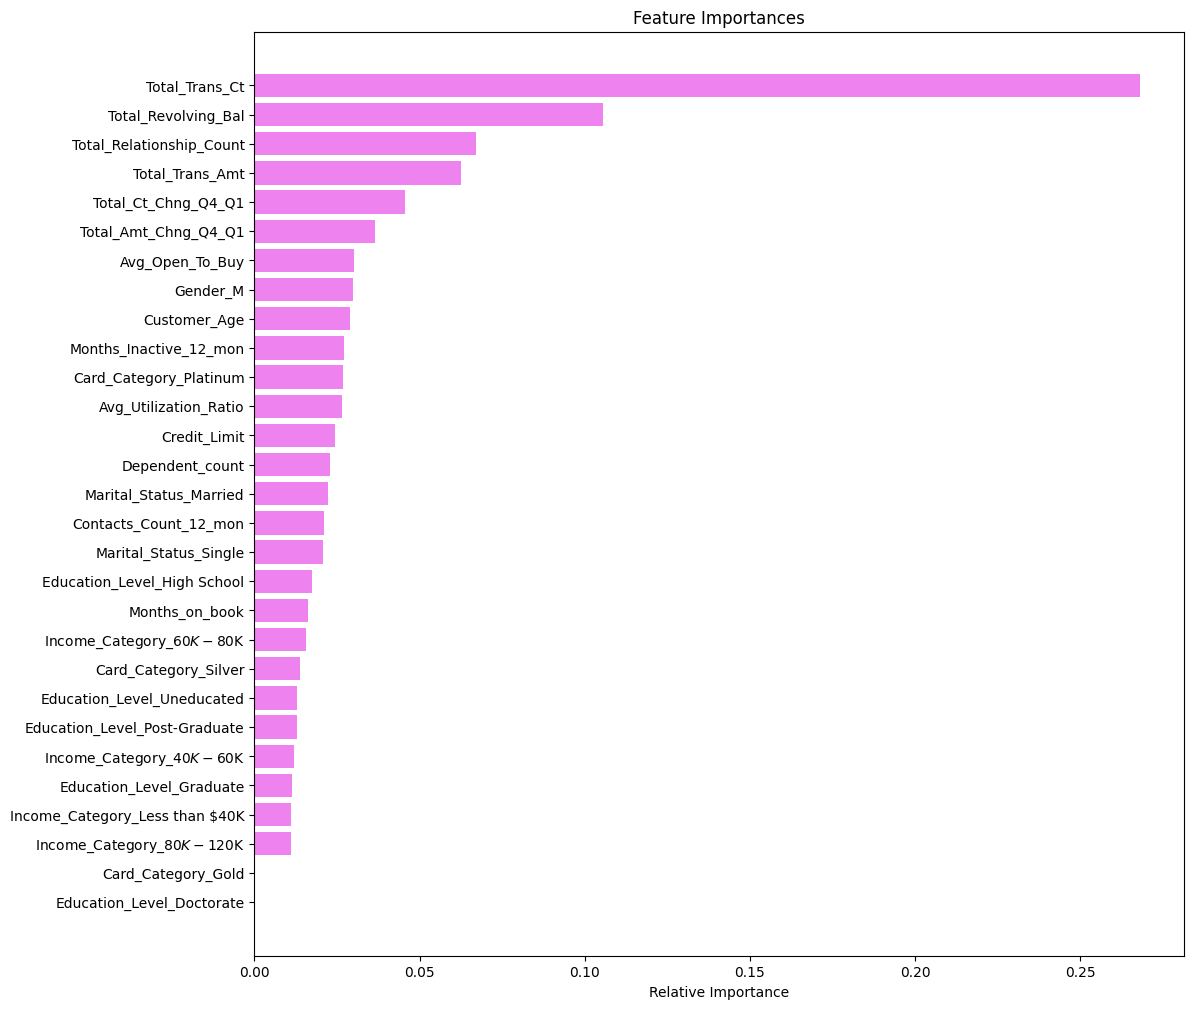

In [ ]:
feature_names = X_train.columns
importances =  tuned_xgb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [ ]:
print(pd.DataFrame(tuned_xgb.feature_importances_, columns = ["Imp"], index = X_train_un.columns).sort_values(by = 'Imp', ascending = False))

                                 Imp
Total_Trans_Ct                 0.268
Total_Revolving_Bal            0.105
Total_Relationship_Count       0.067
Total_Trans_Amt                0.062
Total_Ct_Chng_Q4_Q1            0.046
Total_Amt_Chng_Q4_Q1           0.037
Avg_Open_To_Buy                0.030
Gender_M                       0.030
Customer_Age                   0.029
Months_Inactive_12_mon         0.027
Card_Category_Platinum         0.027
Avg_Utilization_Ratio          0.026
Credit_Limit                   0.024
Dependent_count                0.023
Marital_Status_Married         0.022
Contacts_Count_12_mon          0.021
Marital_Status_Single          0.021
Education_Level_High School    0.017
Months_on_book                 0.016
Income_Category_$60K - $80K    0.016
Card_Category_Silver           0.014
Education_Level_Uneducated     0.013
Education_Level_Post-Graduate  0.013
Income_Category_$40K - $60K    0.012
Education_Level_Graduate       0.011
Income_Category_Less than $40K 0.011
I

The 5 most important features are:


1.   Total_Trans_Ct (0.268)
2.   Total_Revolving_Bal (0.105)
3.   Total_Relationship_Count(0.067)
4.   Total_Trans_Amt
5.   Total_Ct_Chng_Q4_Q1



# Business Insights and Conclusions

* For customers who have Attrited, their `Total_Trans_Ct` was lower than customers who stayed with the bank. This would indicate that they are using their cards less than the customers who are still with the bank.
* For customers who have Attrited, their `Total_Revolving_Bal` was split. It seemed that there were customers just not using the card and as such had a revolving balance of 0 or there were customers who had a high revolving balance near 2500 and could have been lost due to default.
* For customers who have Attrited, their `Total_Relationship_Count` tended to be either 1 or 2 indicating that they held very little products and probably didn't interact as much with the bank
* For customers who have Attrited, their `Total_Trans_Amt` would indicate that when they did spend money it was in low amounts.
* For customers who have Attrited, their `Total_Ct_Chng_Q4_Q1` indicates that these customers most likely spent once before leaving.

**Suggestions**

Customers who are likely to Attrite spend less and spend less frequently than customers who are being retained. They also tend to have less products through the bank. On the other side, customers with a high Total Revolving Balance can also Attrite due to potentially defaulting or closing the accounts to attempt to get above their debts.

As such, the recommendation is to engage these customers with deals and promos to encourage more spending.
Examples:
*  A special rate for x amount of months
*  Spend money to earn money
*  Cash back or bonuses for spending at specific vendors
*  Deals on other bank products that encourage customer's relationship with the bank such as open one product and save on another.
* Special rates for large purchases
* In house payment plans for large value purchases
* Run seasonal promos and deals for customers who haven't been active at the bank in the past 6 months..etc.
